In [1]:
import sys,os,time 
import h5py

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

sys.path.append('/home/nexus-admin/NEXUS_RF/BackendTools')
import PulseFitting as pf

In [2]:
day_str    = "20230216"
V_led      = 4.0
# f_avg_name = day_str+"_avg_pulses.h5"
f_avg_name = day_str+"_avg_pulses_Vled_"+str(V_led)+".h5"
data       = pd.read_hdf(f_avg_name, key="data")
# data       = pd.read_hdf(f_avg_name, key="k2")
data

time(ms)       350       325       300       275       250       225  \
0         0.00 -0.000026 -0.000111  0.000248 -0.000104 -0.000316  0.000109   
1         0.02 -0.000171 -0.000007  0.000011  0.000176  0.000019 -0.000087   
2         0.04 -0.000306  0.000010  0.000084 -0.000170 -0.000193  0.000224   
3         0.06  0.000025  0.000141 -0.000147 -0.000151 -0.000077  0.000108   
4         0.08 -0.000083  0.000095 -0.000035 -0.000185 -0.000321 -0.000102   
...        ...       ...       ...       ...       ...       ...       ...   
4995     99.90 -0.000080 -0.000115  0.000045 -0.000105  0.000014 -0.000271   
4996     99.92 -0.000240 -0.000237  0.000029 -0.000266  0.000057 -0.000116   
4997     99.94  0.000075  0.000007 -0.000033 -0.000307 -0.000096 -0.000296   
4998     99.96  0.000073  0.000112 -0.000258 -0.000242  0.000151 -0.000285   
4999     99.98  0.000065 -0.000178 -0.000165 -0.000066  0.000154 -0.000141   

           200       175       150       125        75        50        25  
0    -0.000111  0.000478  0.000266  0.000144  0.000026 -0.000666 -0.000325  
1    -0.000126 -0.000008  0.000126  0.000175 -0.000452 -0.000040 -0.000480  
2    -0.000269  0.000083  0.000191  0.000143 -0.001527 -0.002479  0.000126  
3    -0.000294 -0.000426 -0.000149 -0.000080 -0.001011 -0.000862 -0.000246  
4     0.000062 -0.000194 -0.000096  0.000039  0.000179 -0.000847 -0.000940  
...        ...       ...       ...       ...       ...       ...       ...  
4995 -0.000181  0.000036 -0.000290  0.000181  0.000031  0.001850 -0.000428  
4996  0.000285  0.000341 -0.000169 -0.000065 -0.001289  0.001114  0.000278  
4997  0.000237  0.000102 -0.000011 -0.000189 -0.001202  0.001318  0.000358  
4998 -0.000378  0.000085  0.000170 -0.000272  0.000660 -0.000203  0.000794  
4999  0.000061 -0.000091  0.000079  0.000167 -0.001071 -0.000006  0.000706  

[5000 rows x 14 columns]

In [3]:
temps_mK   = np.array(data.keys()[1:]).astype(float)
print(temps_mK)

[350. 325. 300. 275. 250. 225. 200. 175. 150. 125.  75.  50.  25.]


In [4]:
if True:
    temps_mK = temps_mK[ (temps_mK <= 200) ]
    data = data[['time(ms)']+[str(int(temp)) for temp in temps_mK]]

In [5]:
t0 = 4.99
pf.set_fixed_param("t0_ms",t0)
pf.show_fixed_params()

## How much attenuation is in the lines before the chip
line_atten_dB = 56.5

"t0_ms" 4.99


200mK----------
-- Parameter guess for single exponential -- 
     Decay time constant:  0.1399999999999988 ms
     Amplitude at t=0:     443927302197985.75
175mK----------
-- Parameter guess for single exponential -- 
     Decay time constant:  0.23999999999999932 ms
     Amplitude at t=0:     156933131.64745426
150mK----------
-- Parameter guess for single exponential -- 
     Decay time constant:  0.33999999999999986 ms
     Amplitude at t=0:     337454.04906609014
125mK----------
-- Parameter guess for single exponential -- 
     Decay time constant:  0.5599999999999996 ms
     Amplitude at t=0:     885.809917232517
75mK----------
-- Parameter guess for single exponential -- 
     Decay time constant:  1.1799999999999997 ms
     Amplitude at t=0:     5.971831825029082
50mK----------
-- Parameter guess for single exponential -- 
     Decay time constant:  1.2999999999999998 ms
     Amplitude at t=0:     3.021240134410714
25mK----------
-- Parameter guess for single exponential -- 
 

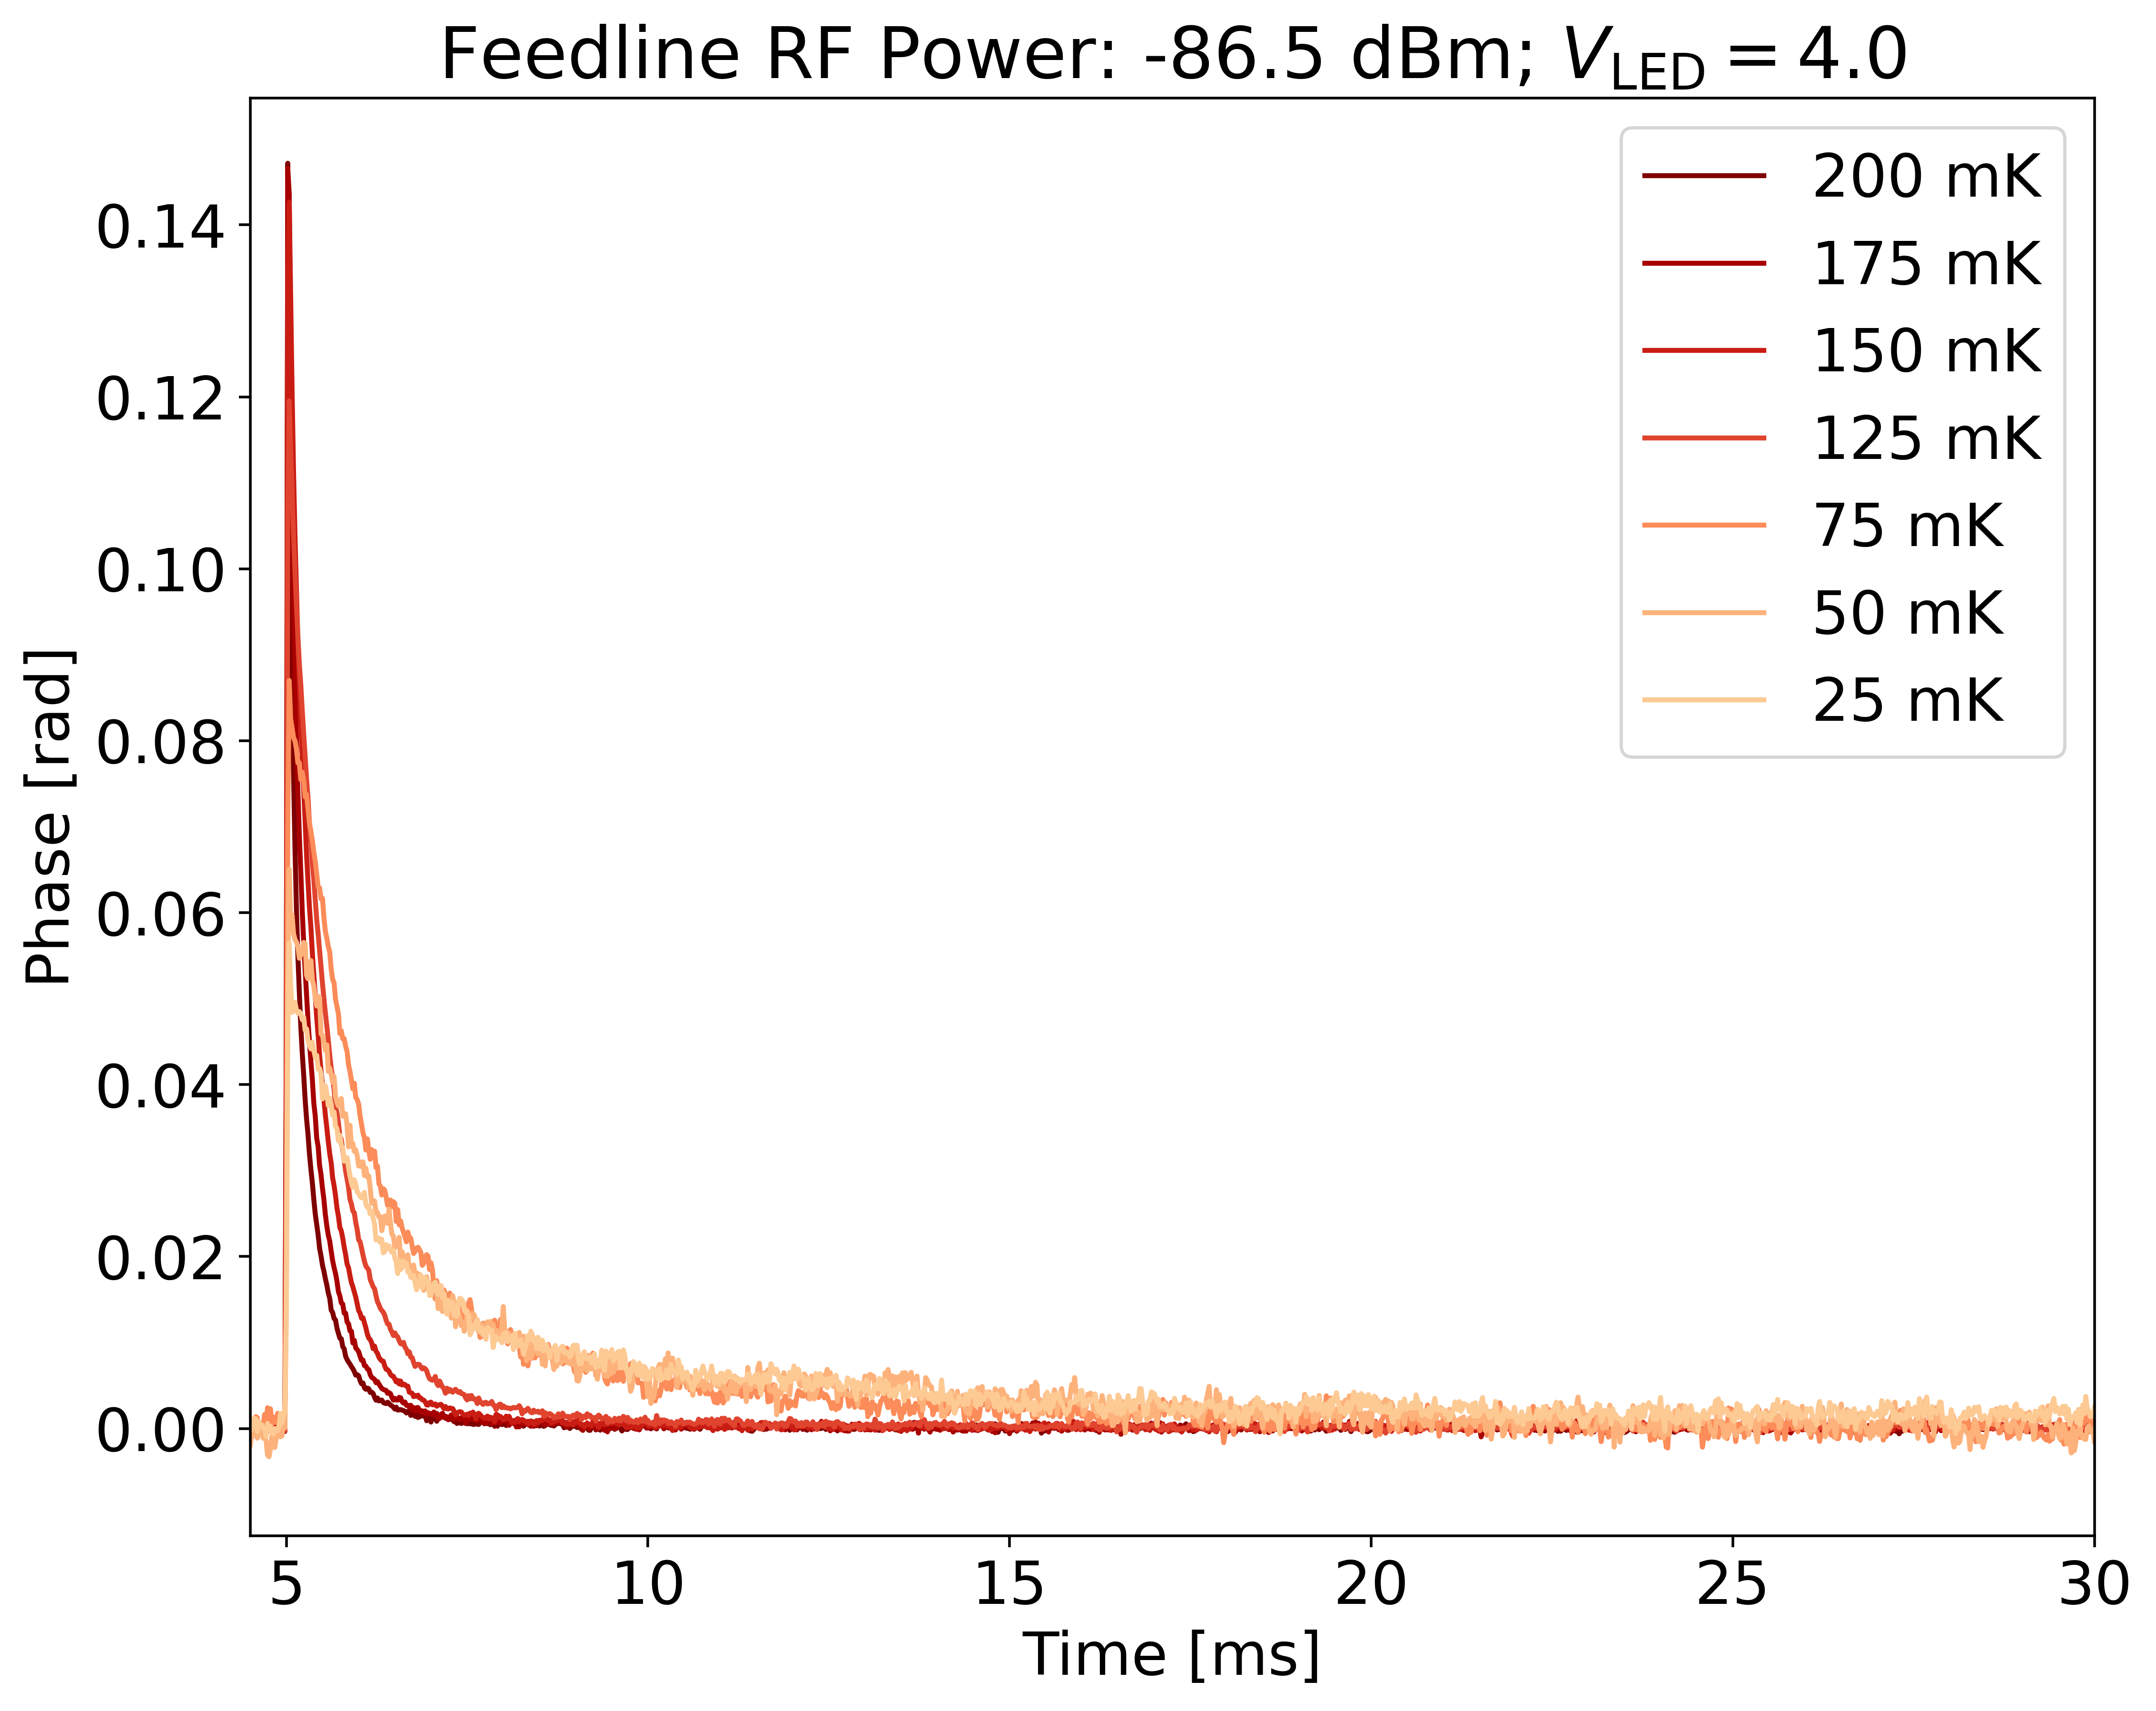

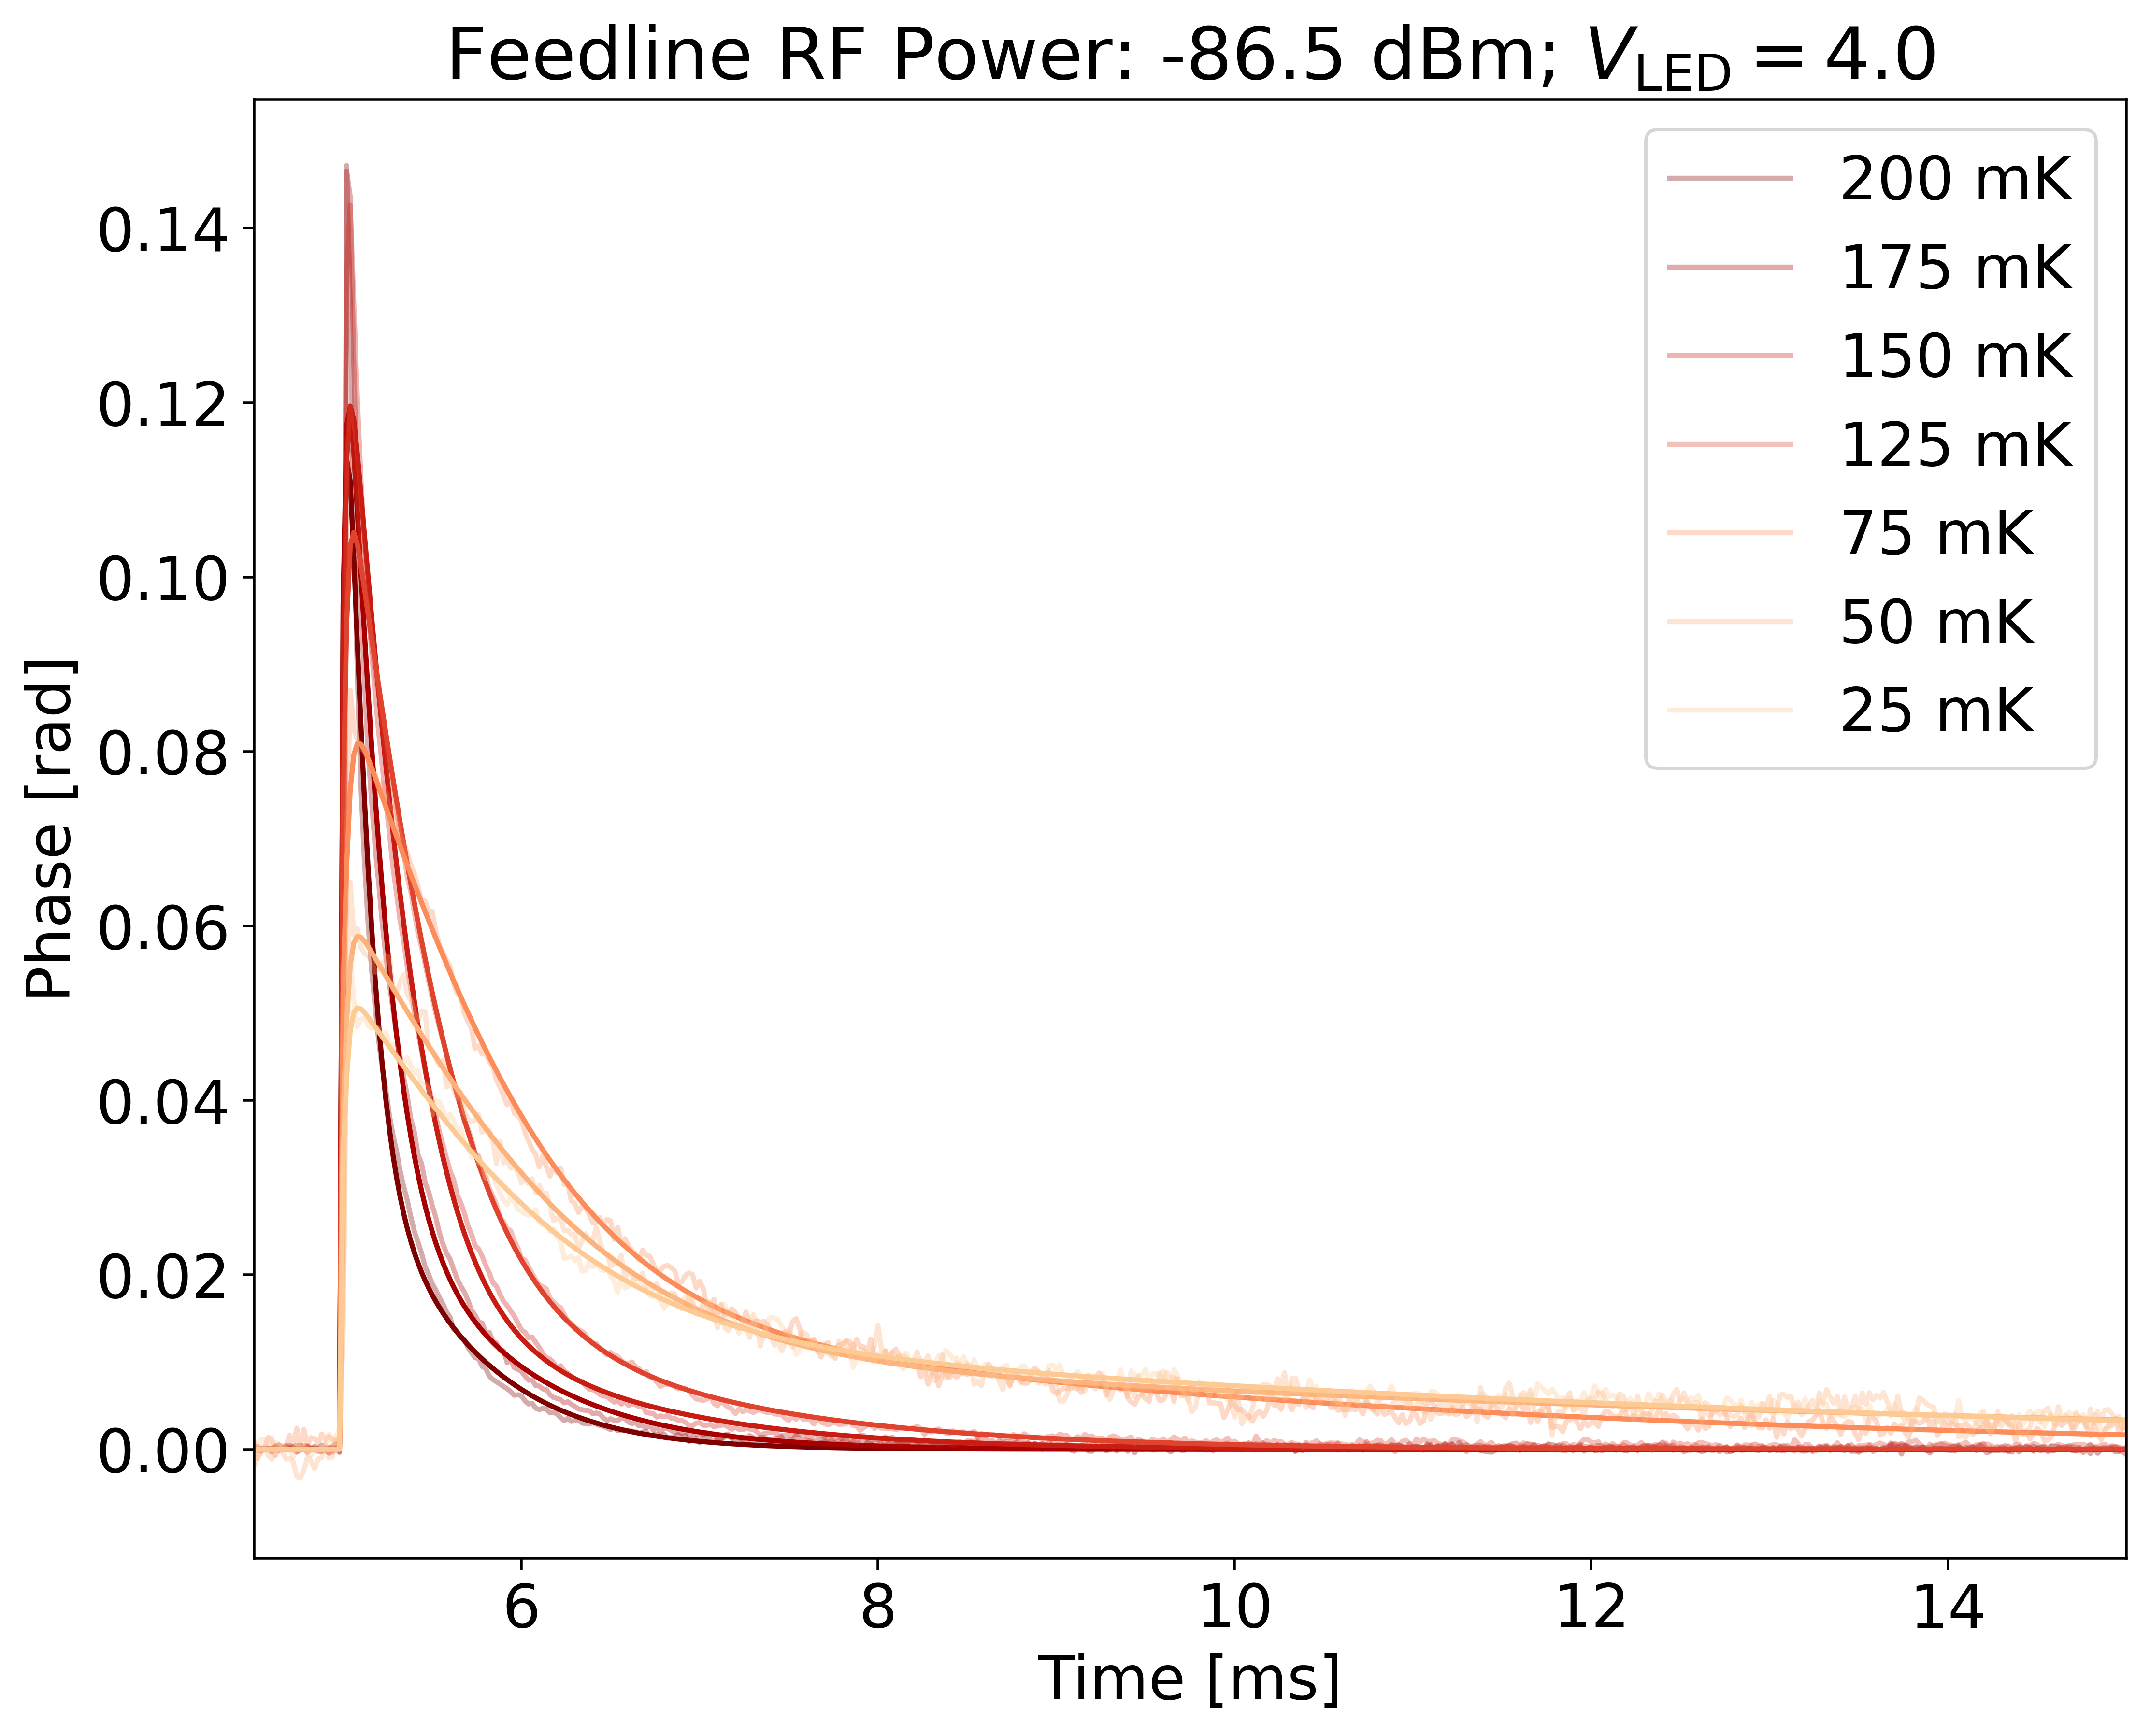

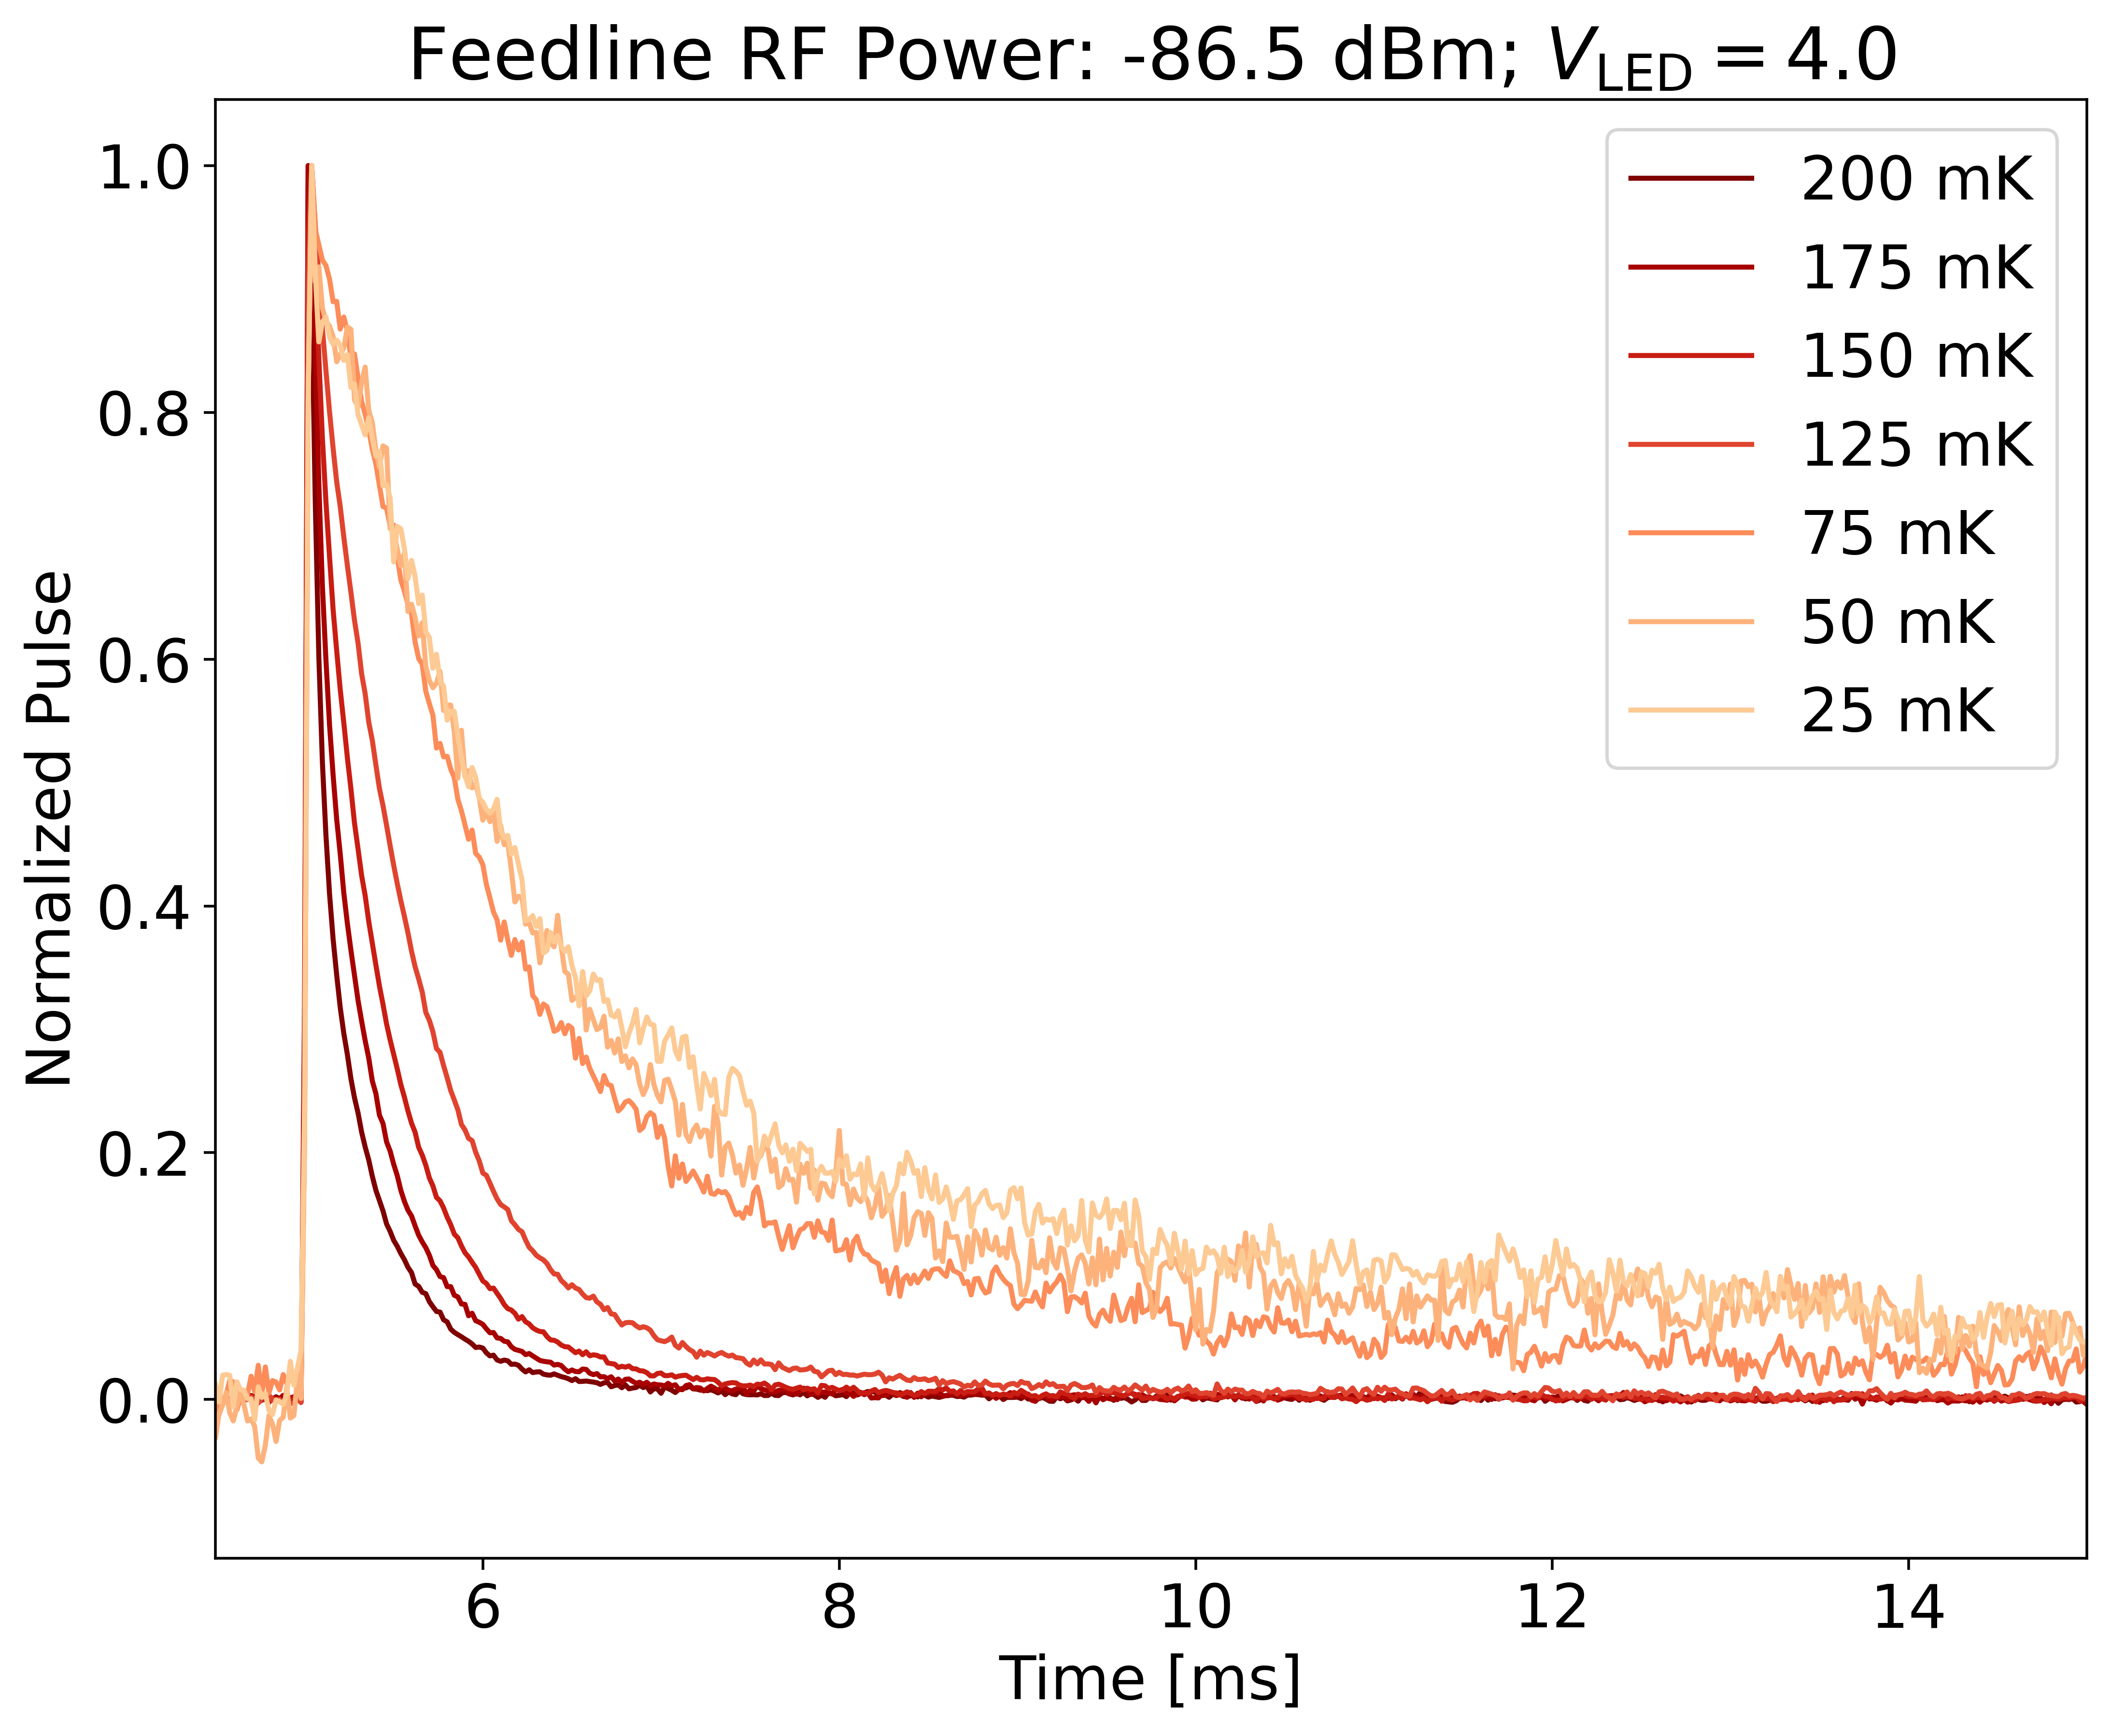

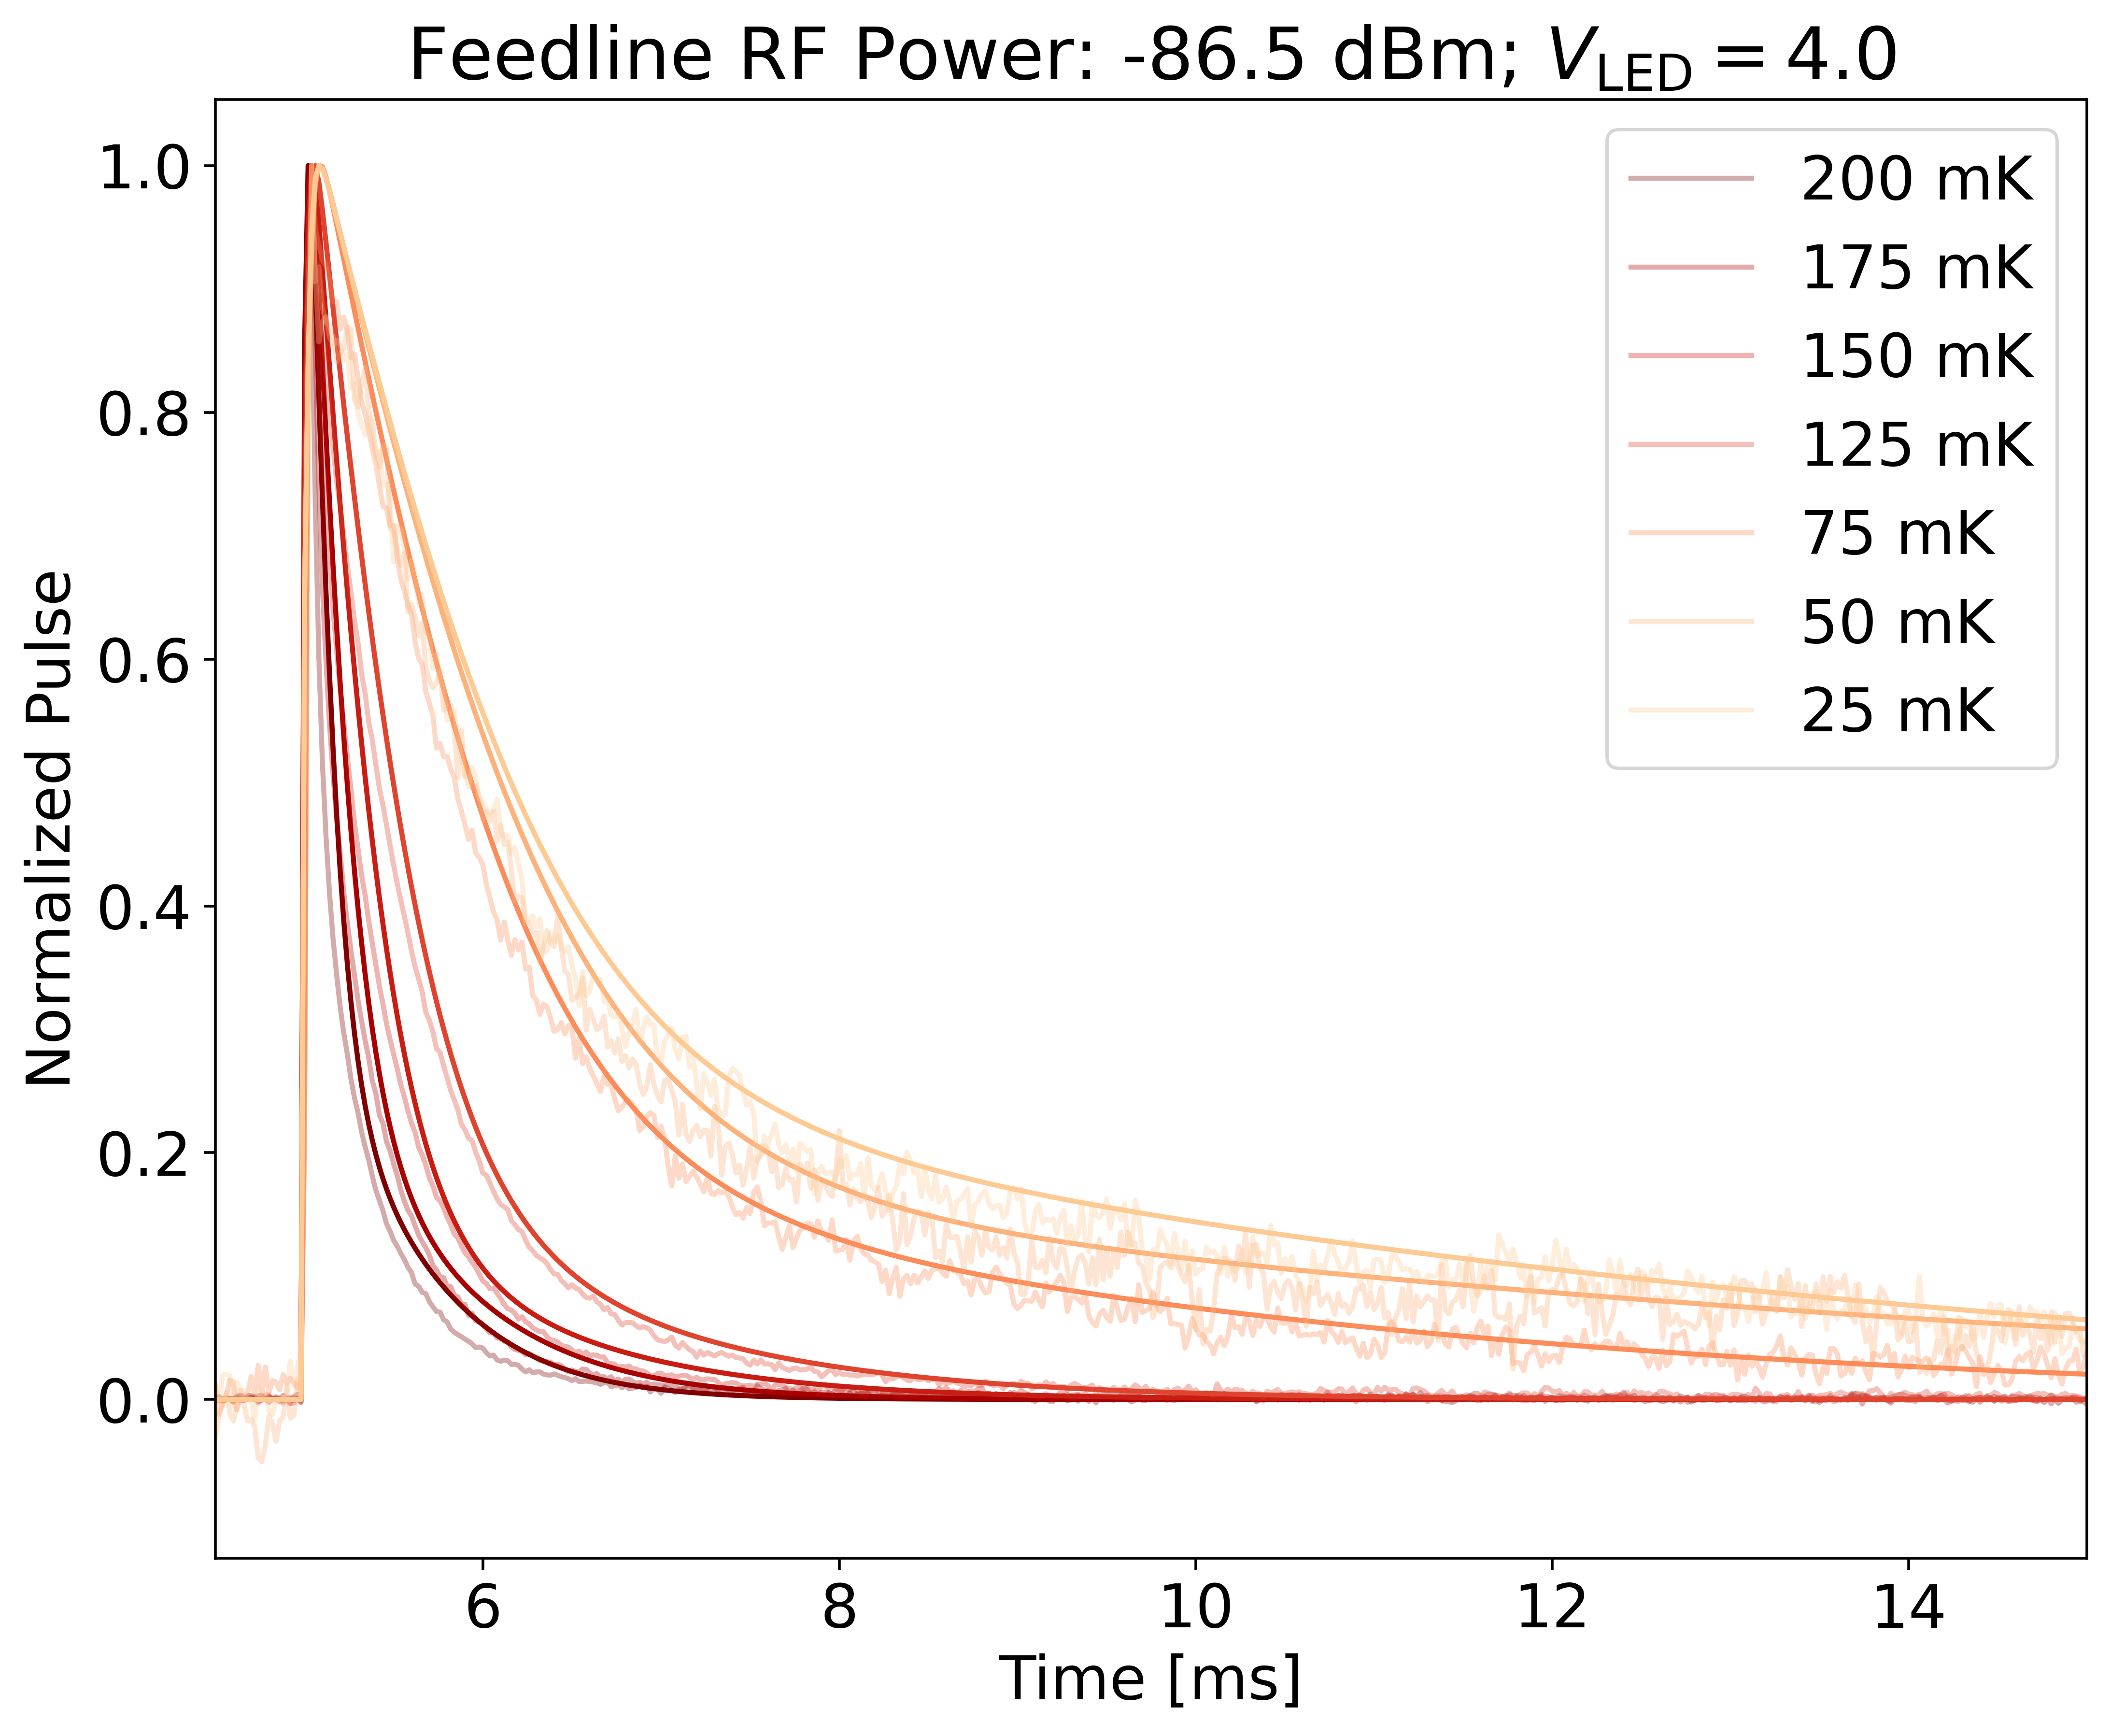

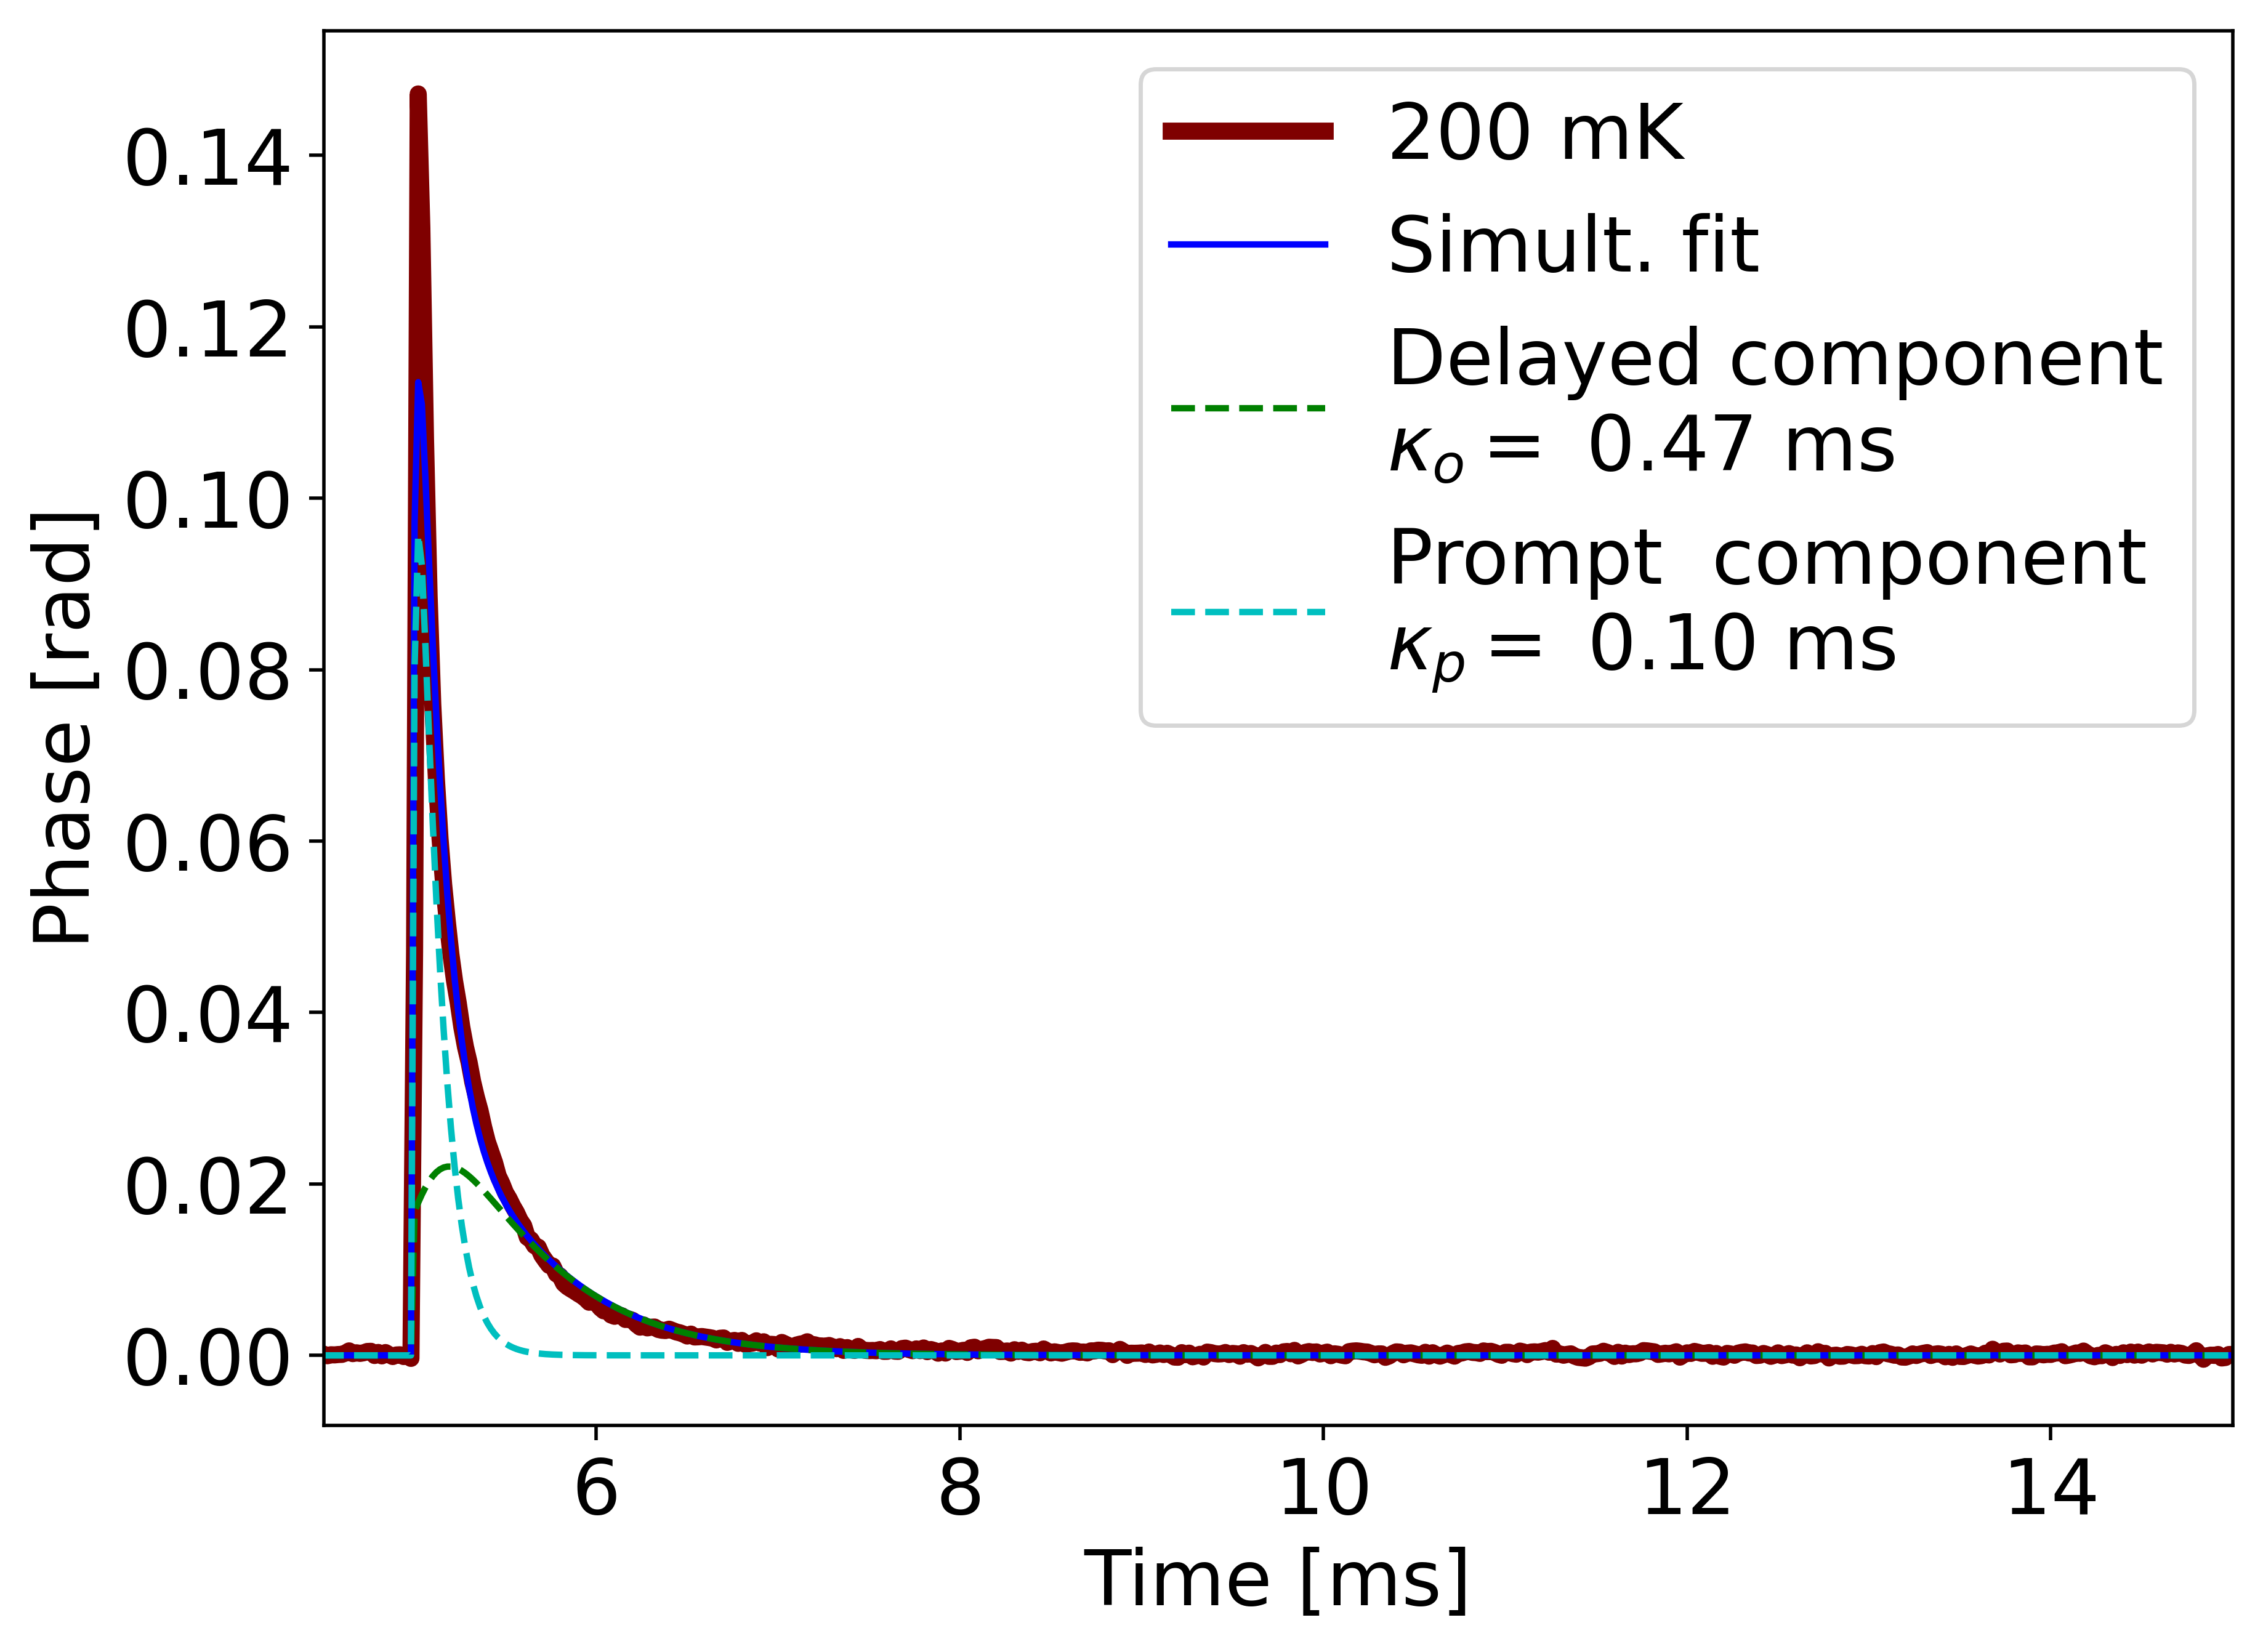

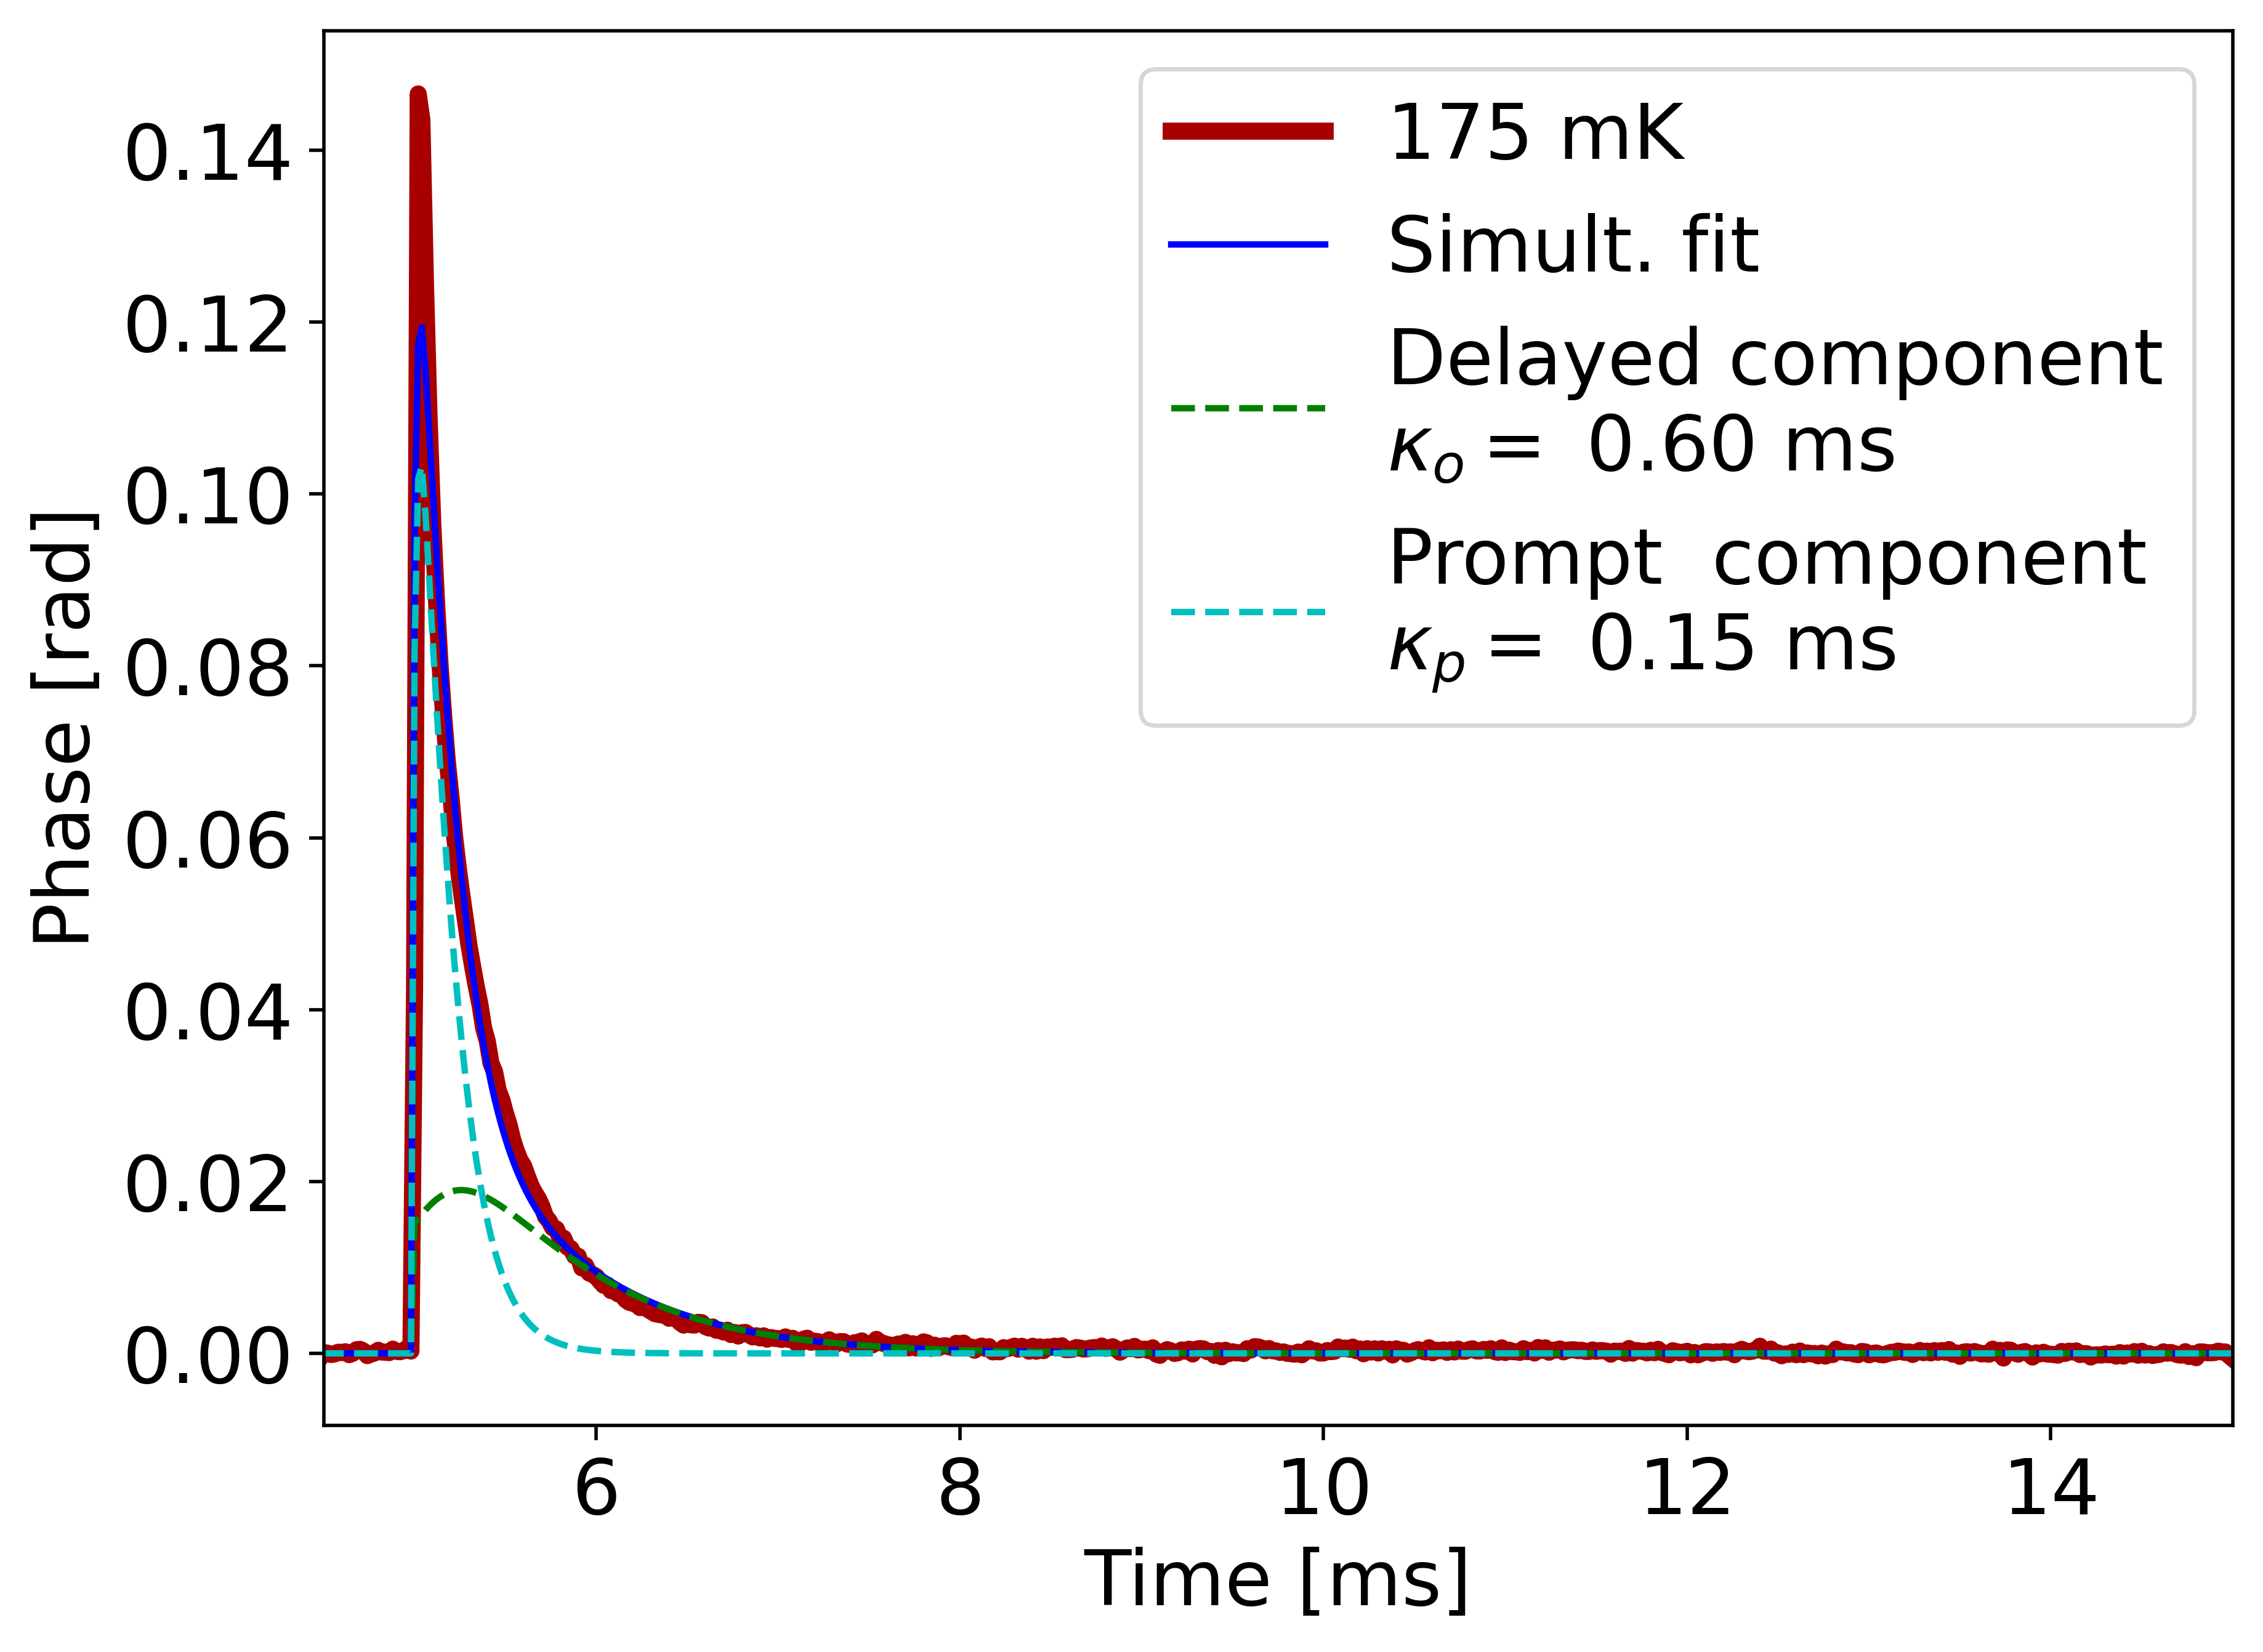

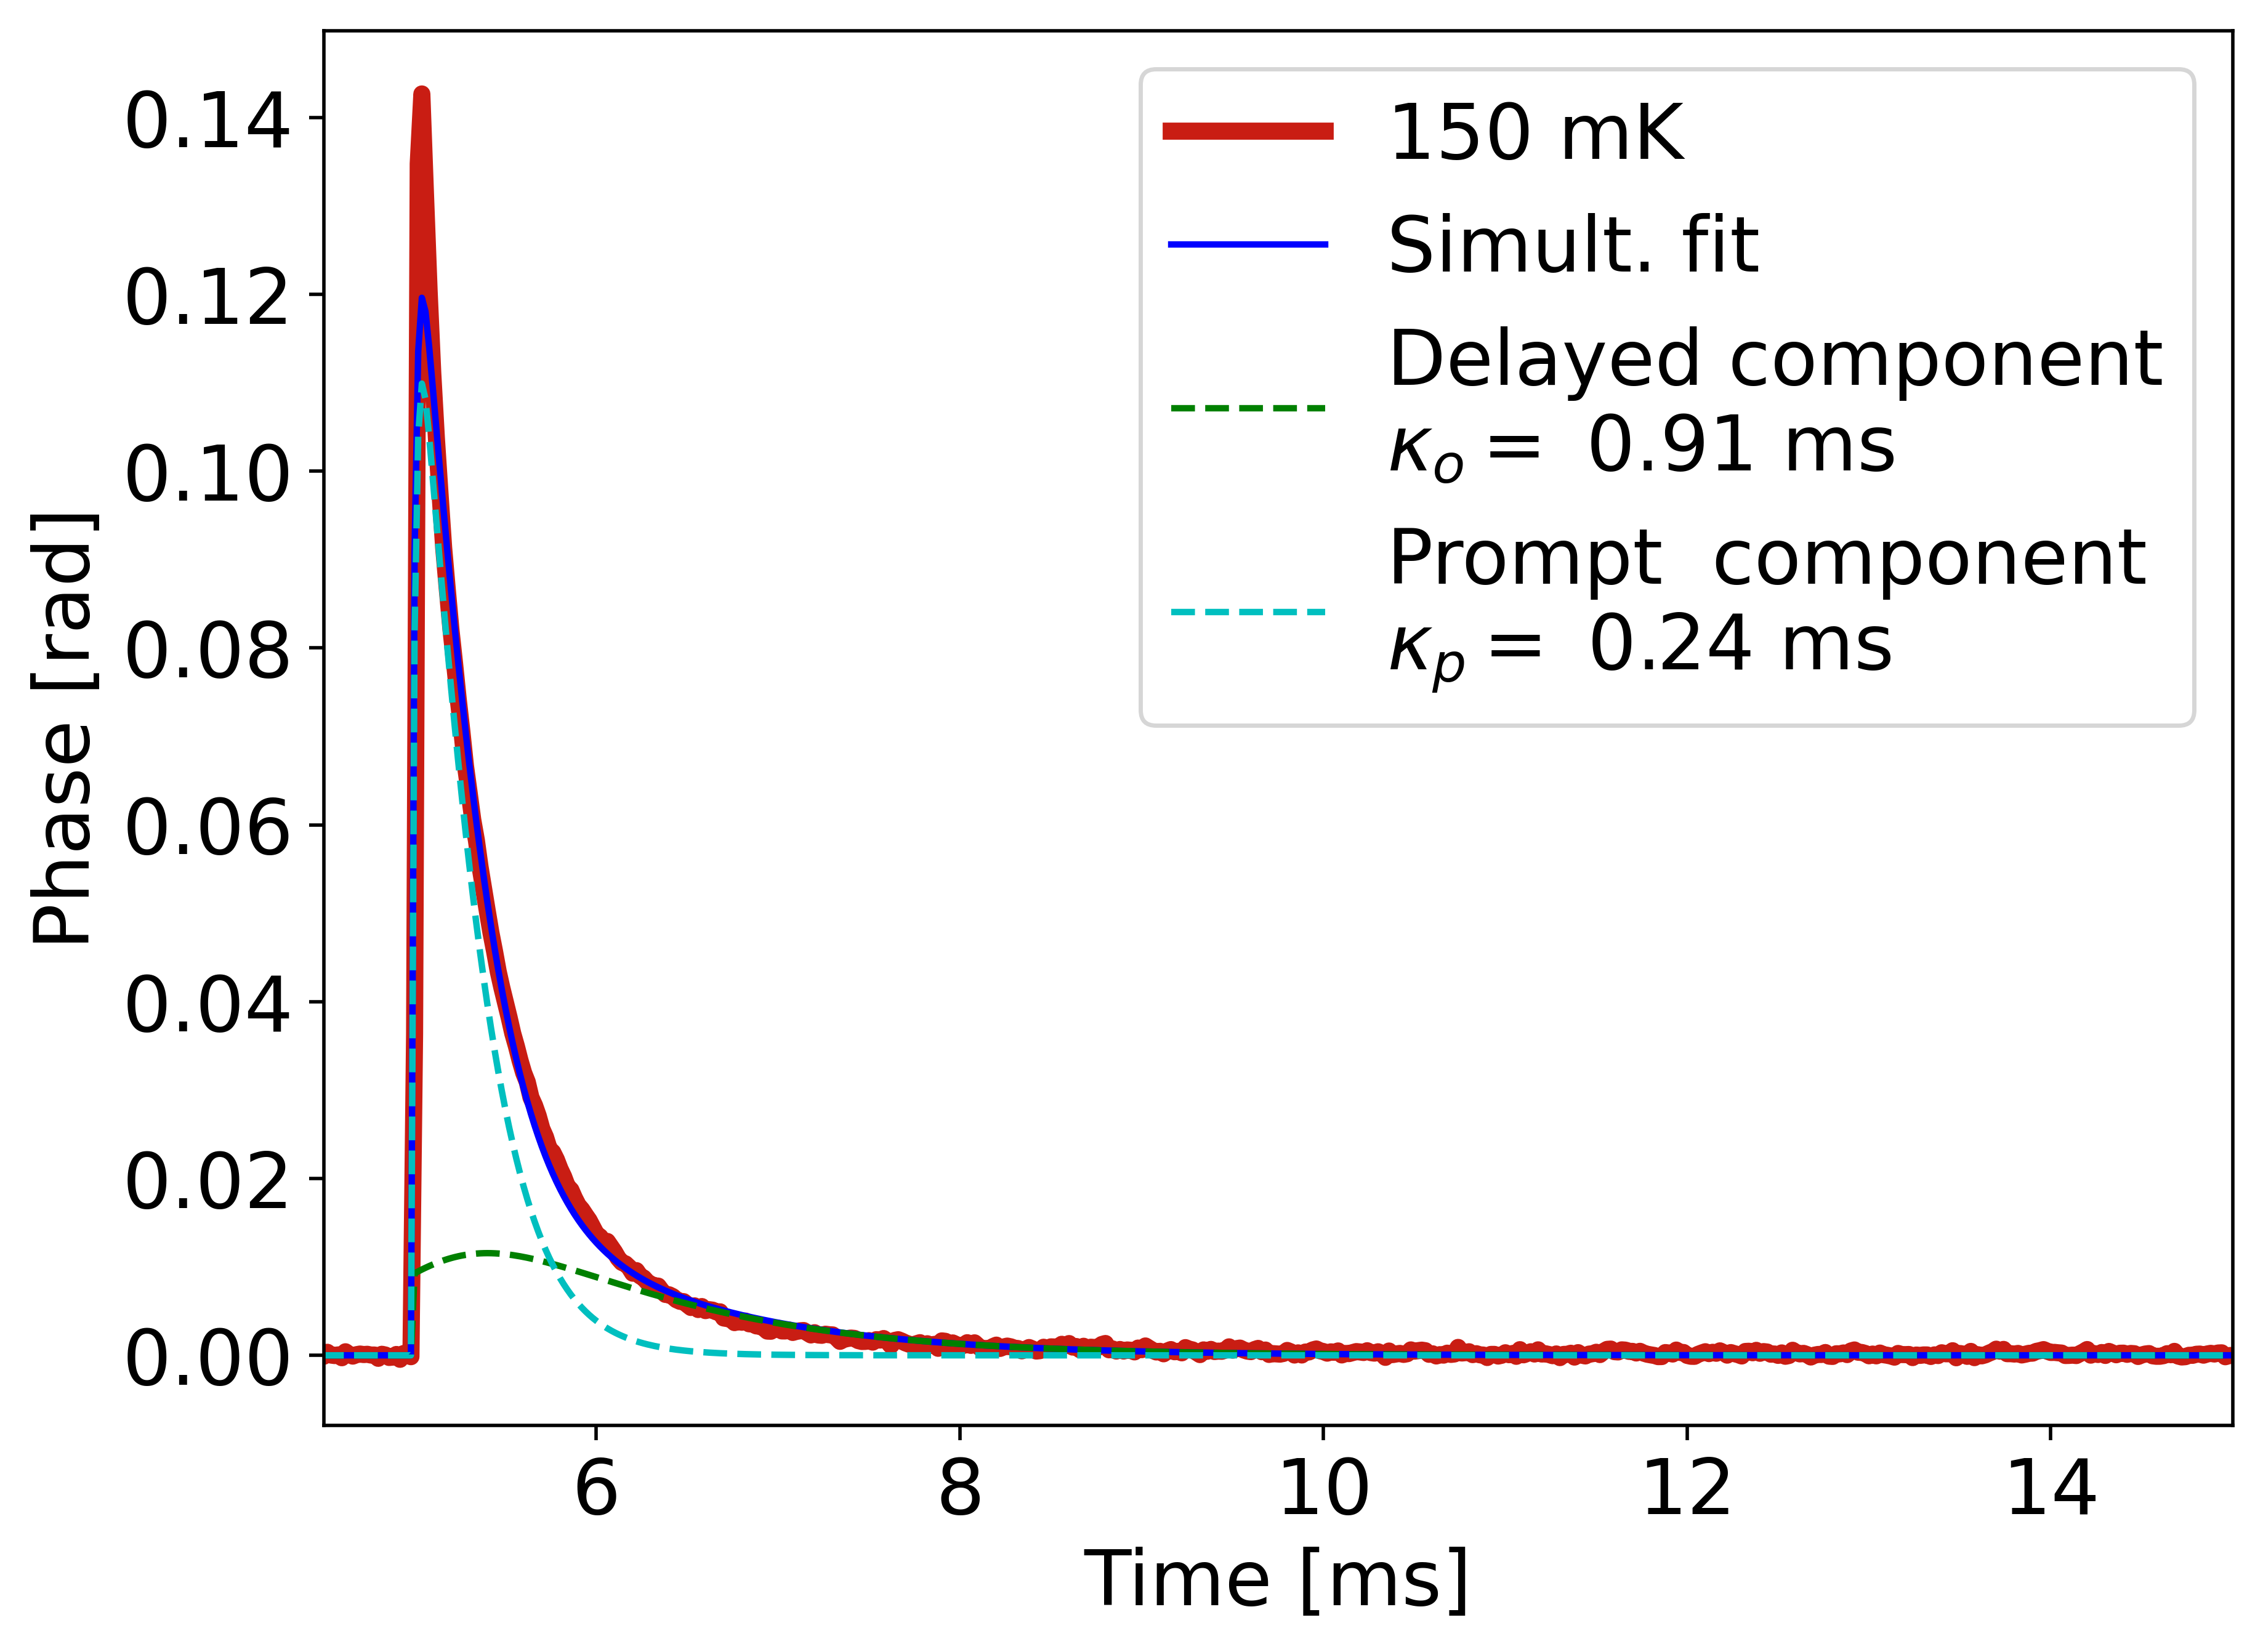

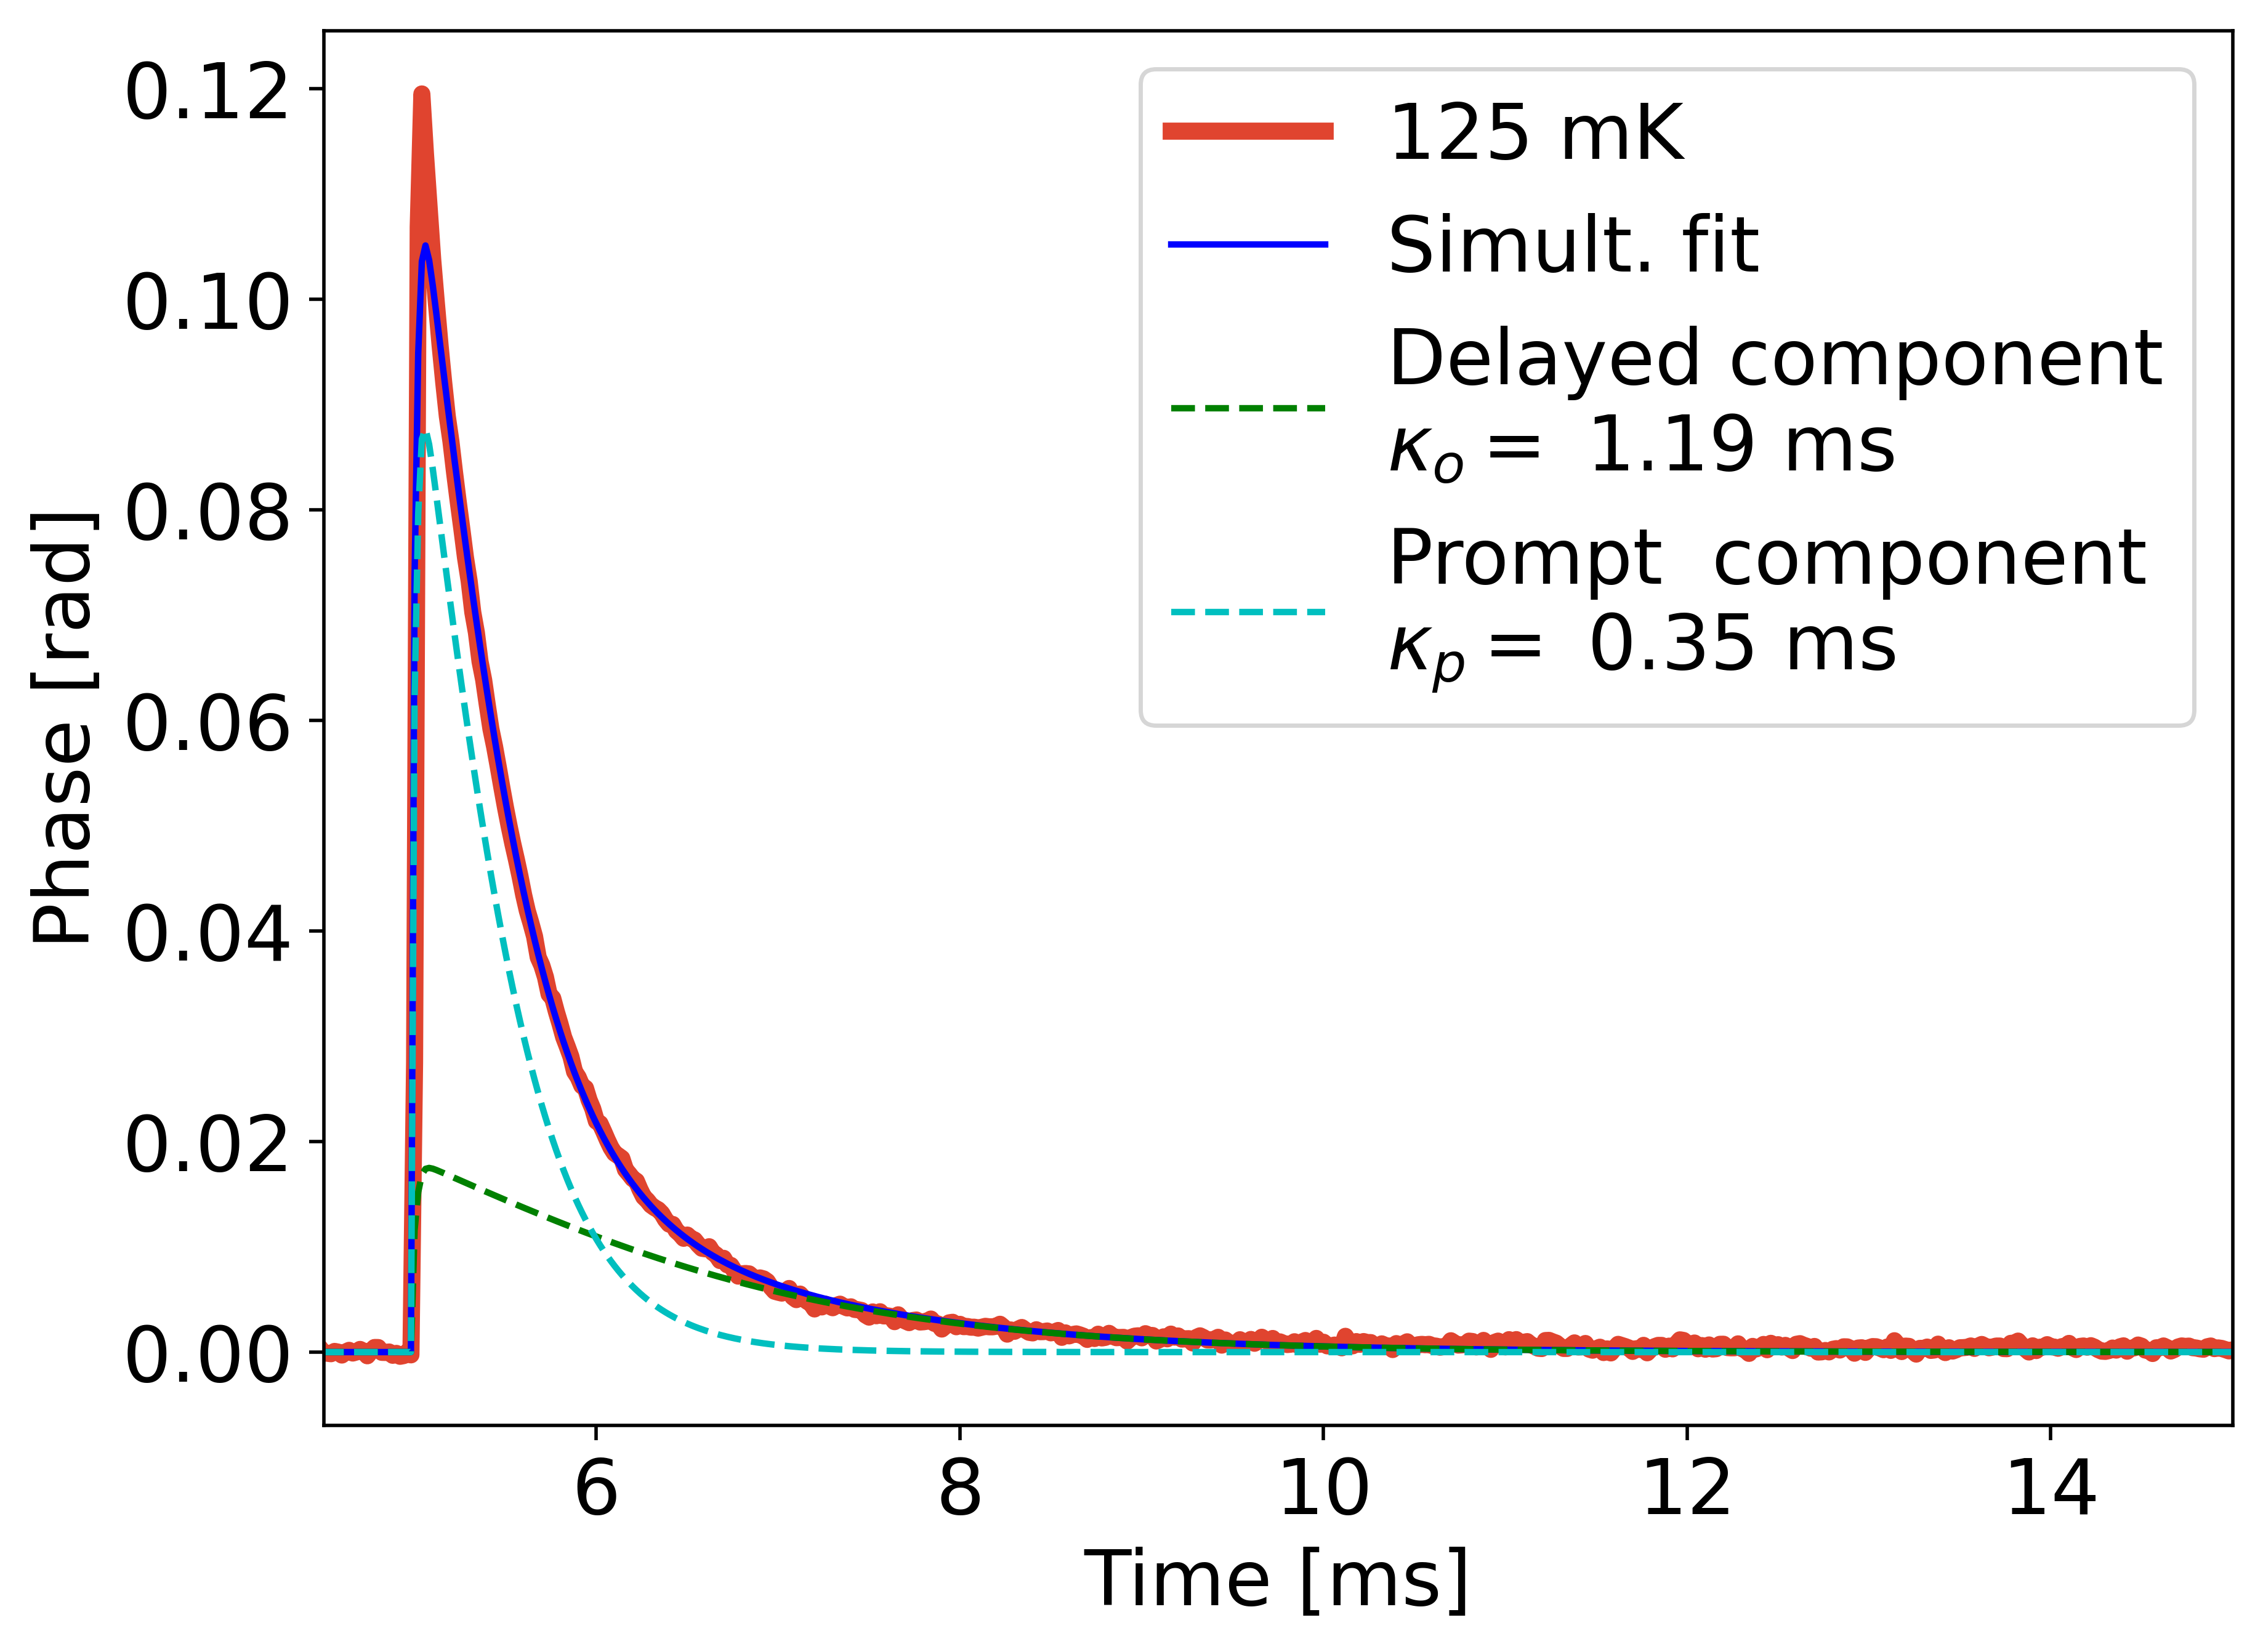

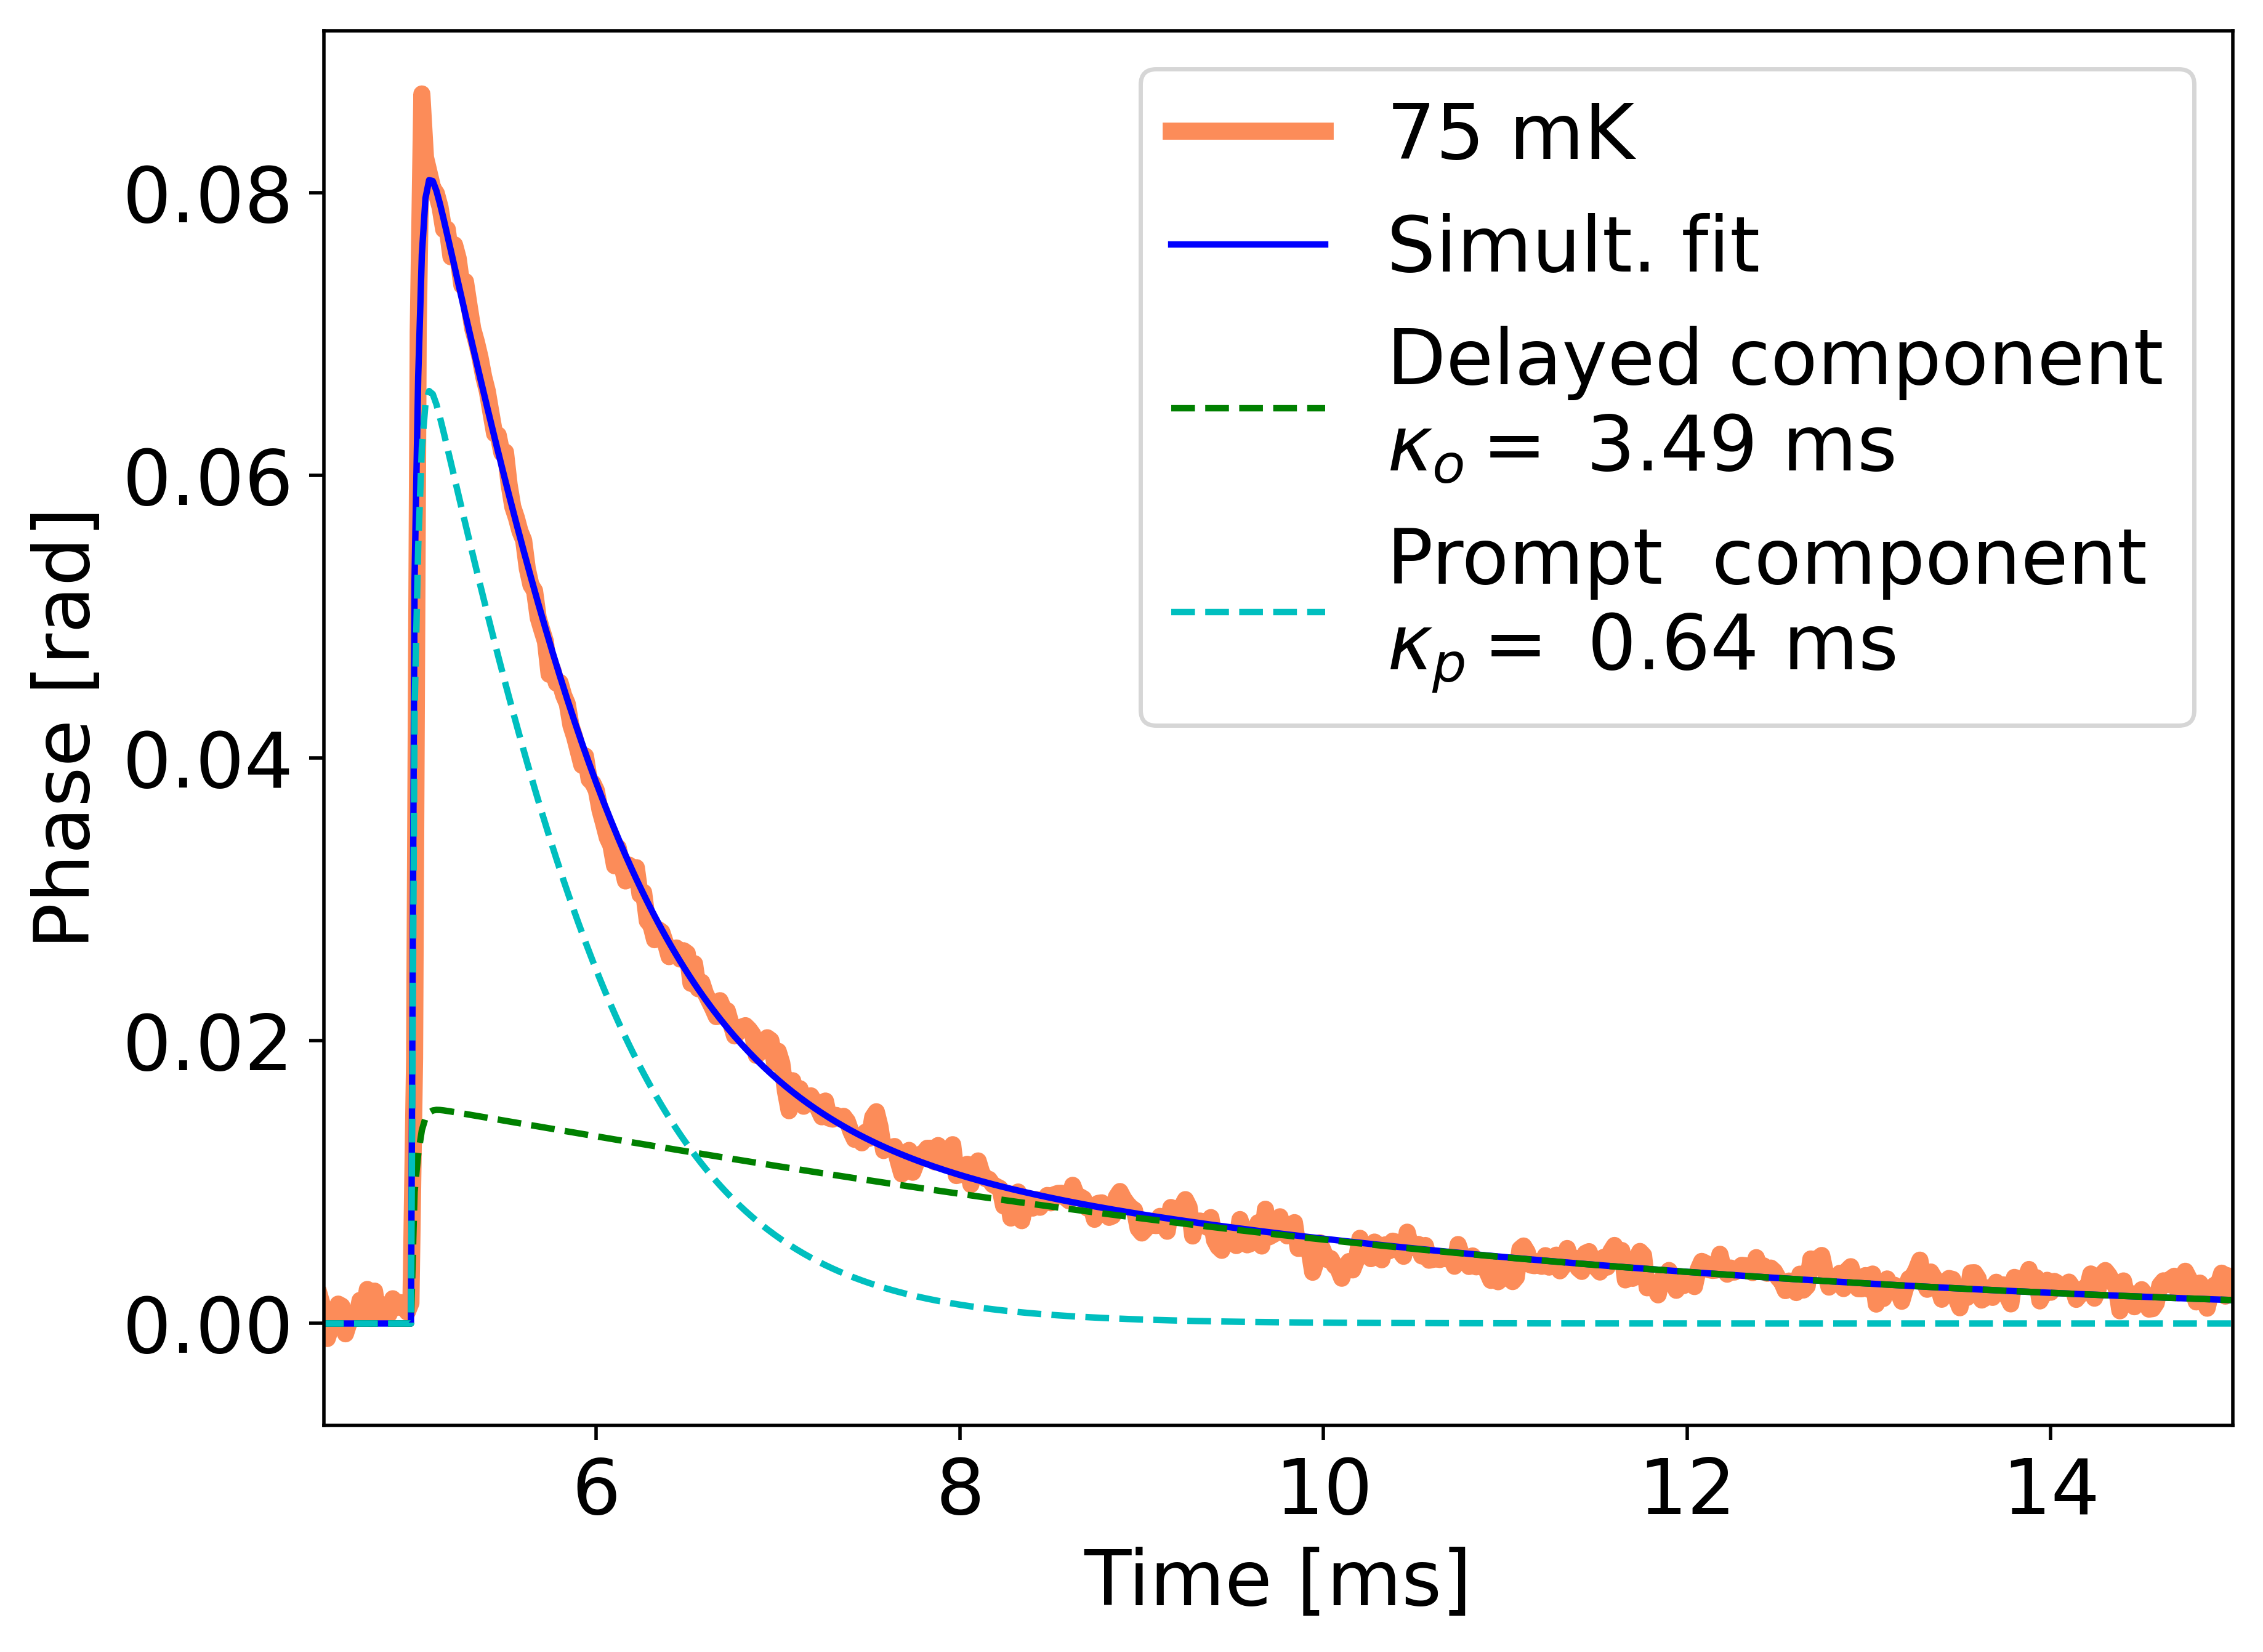

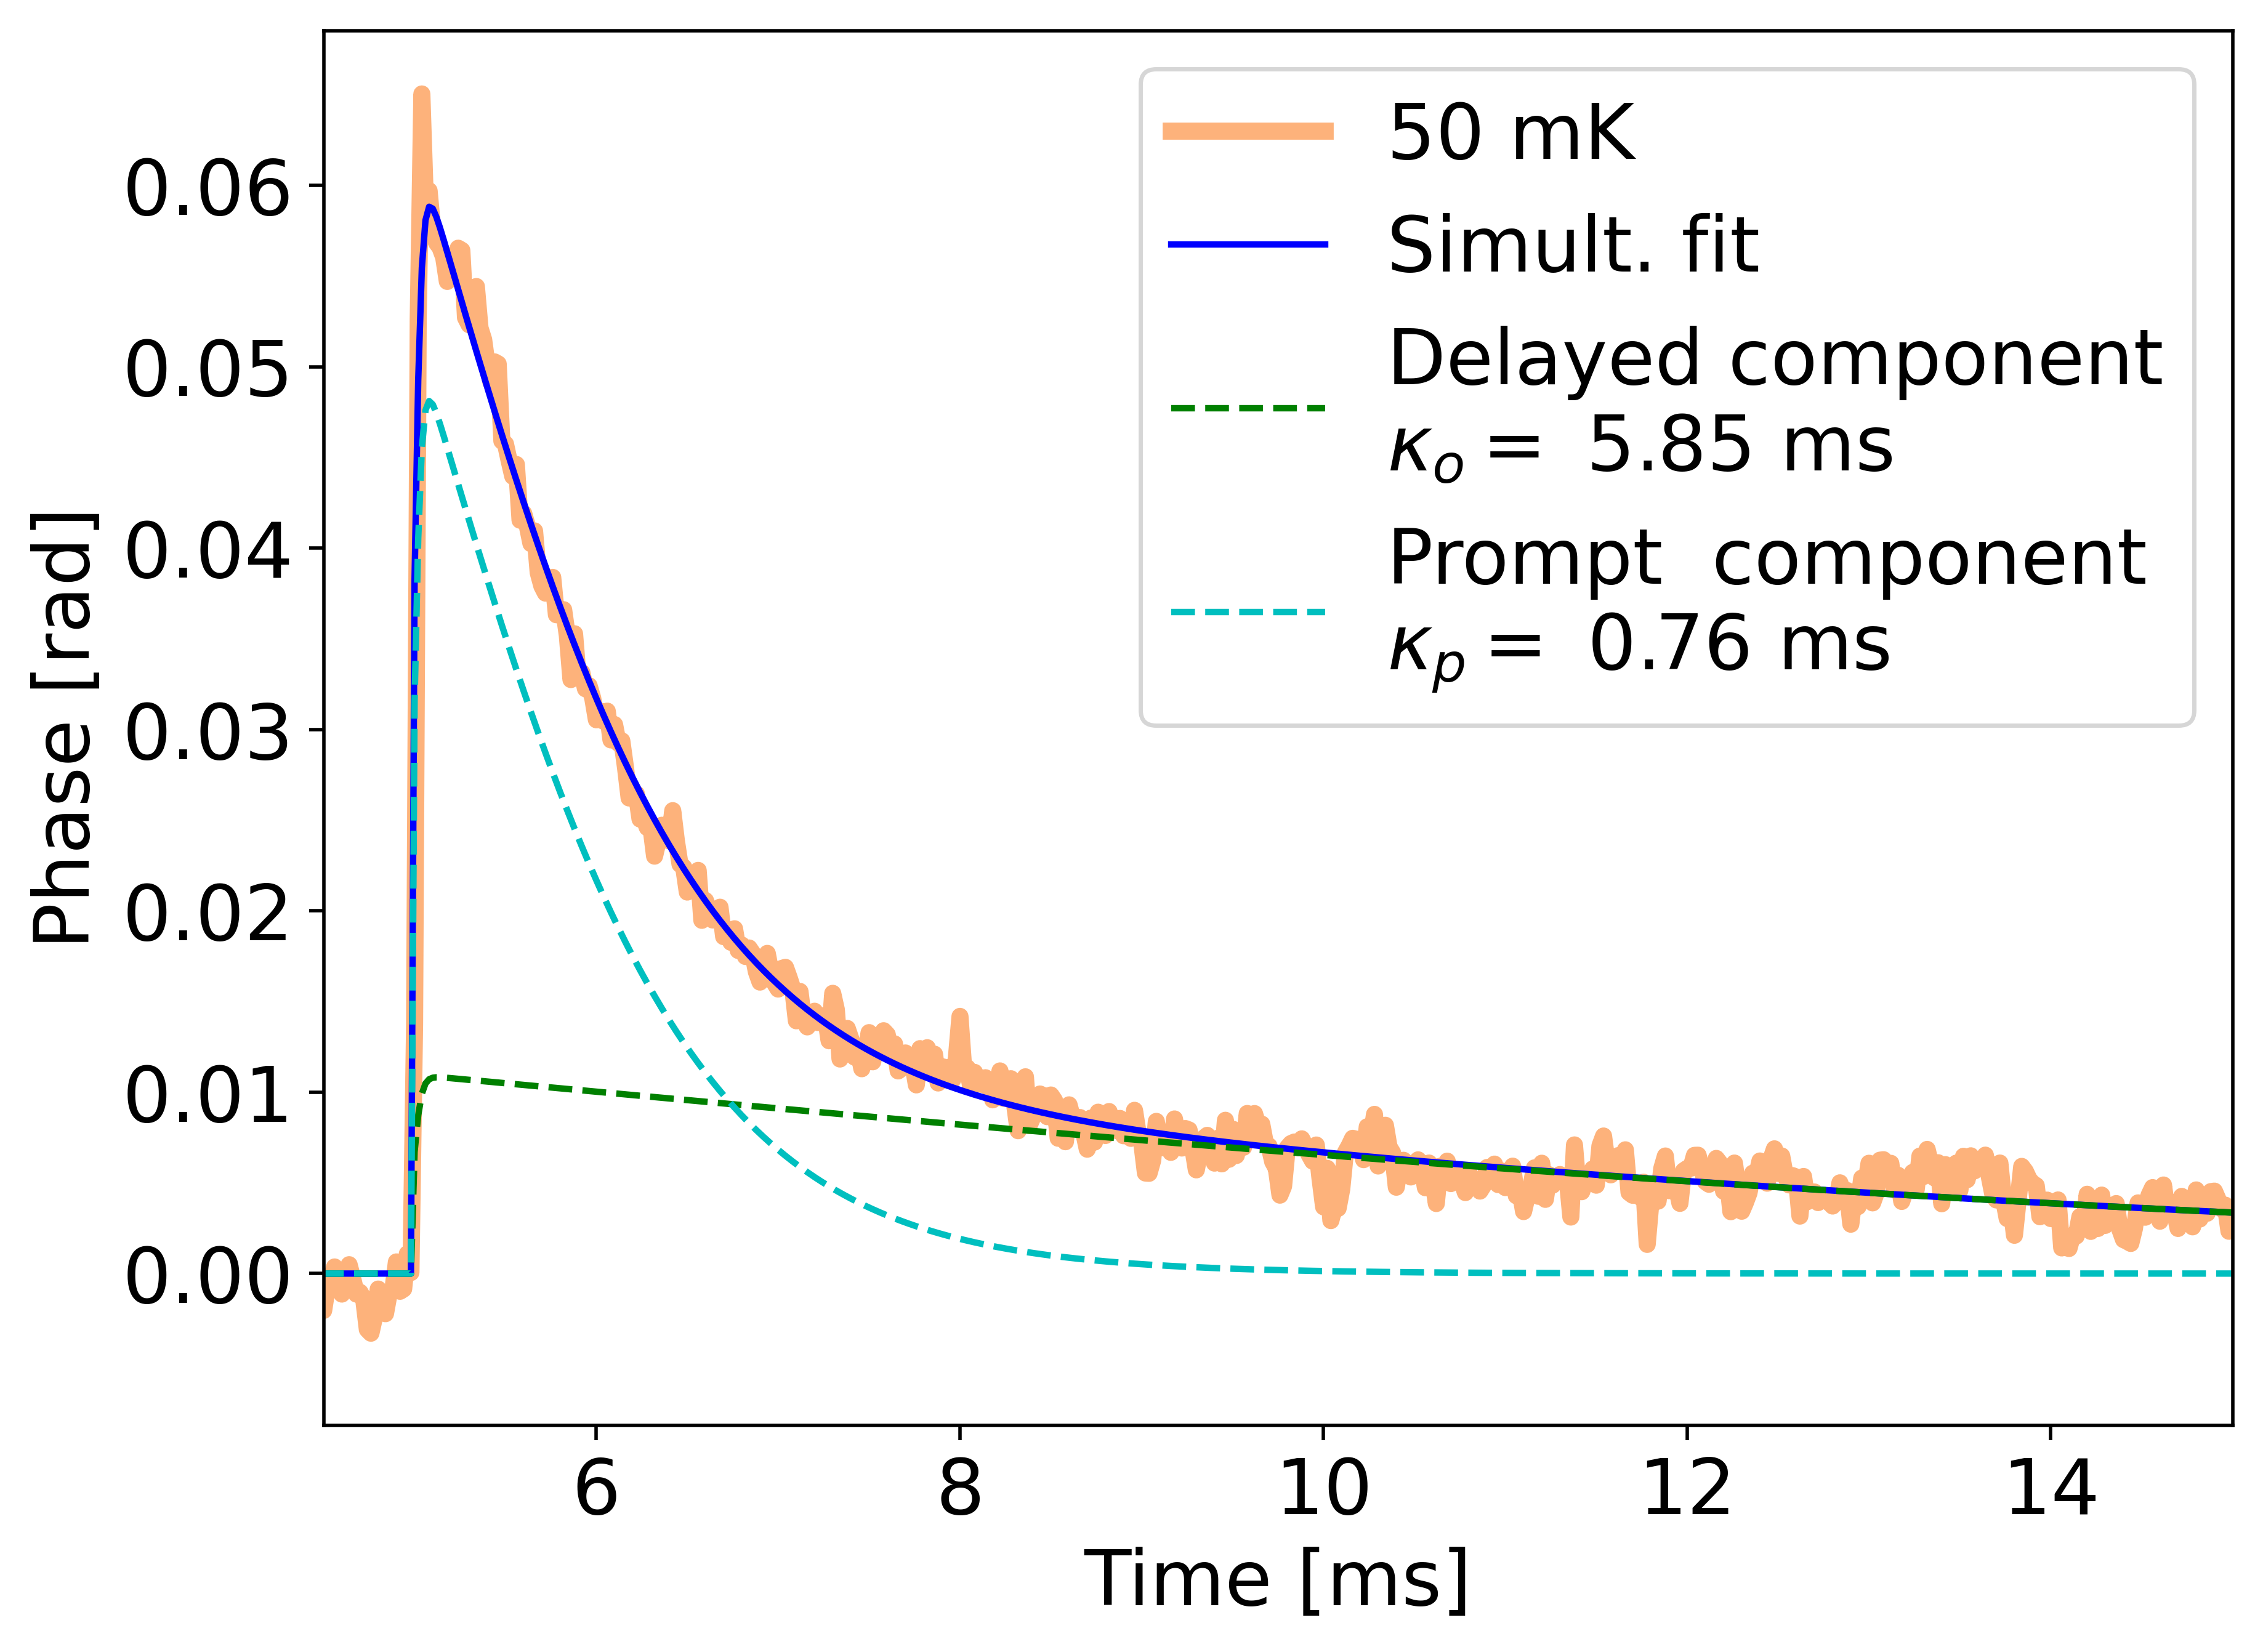

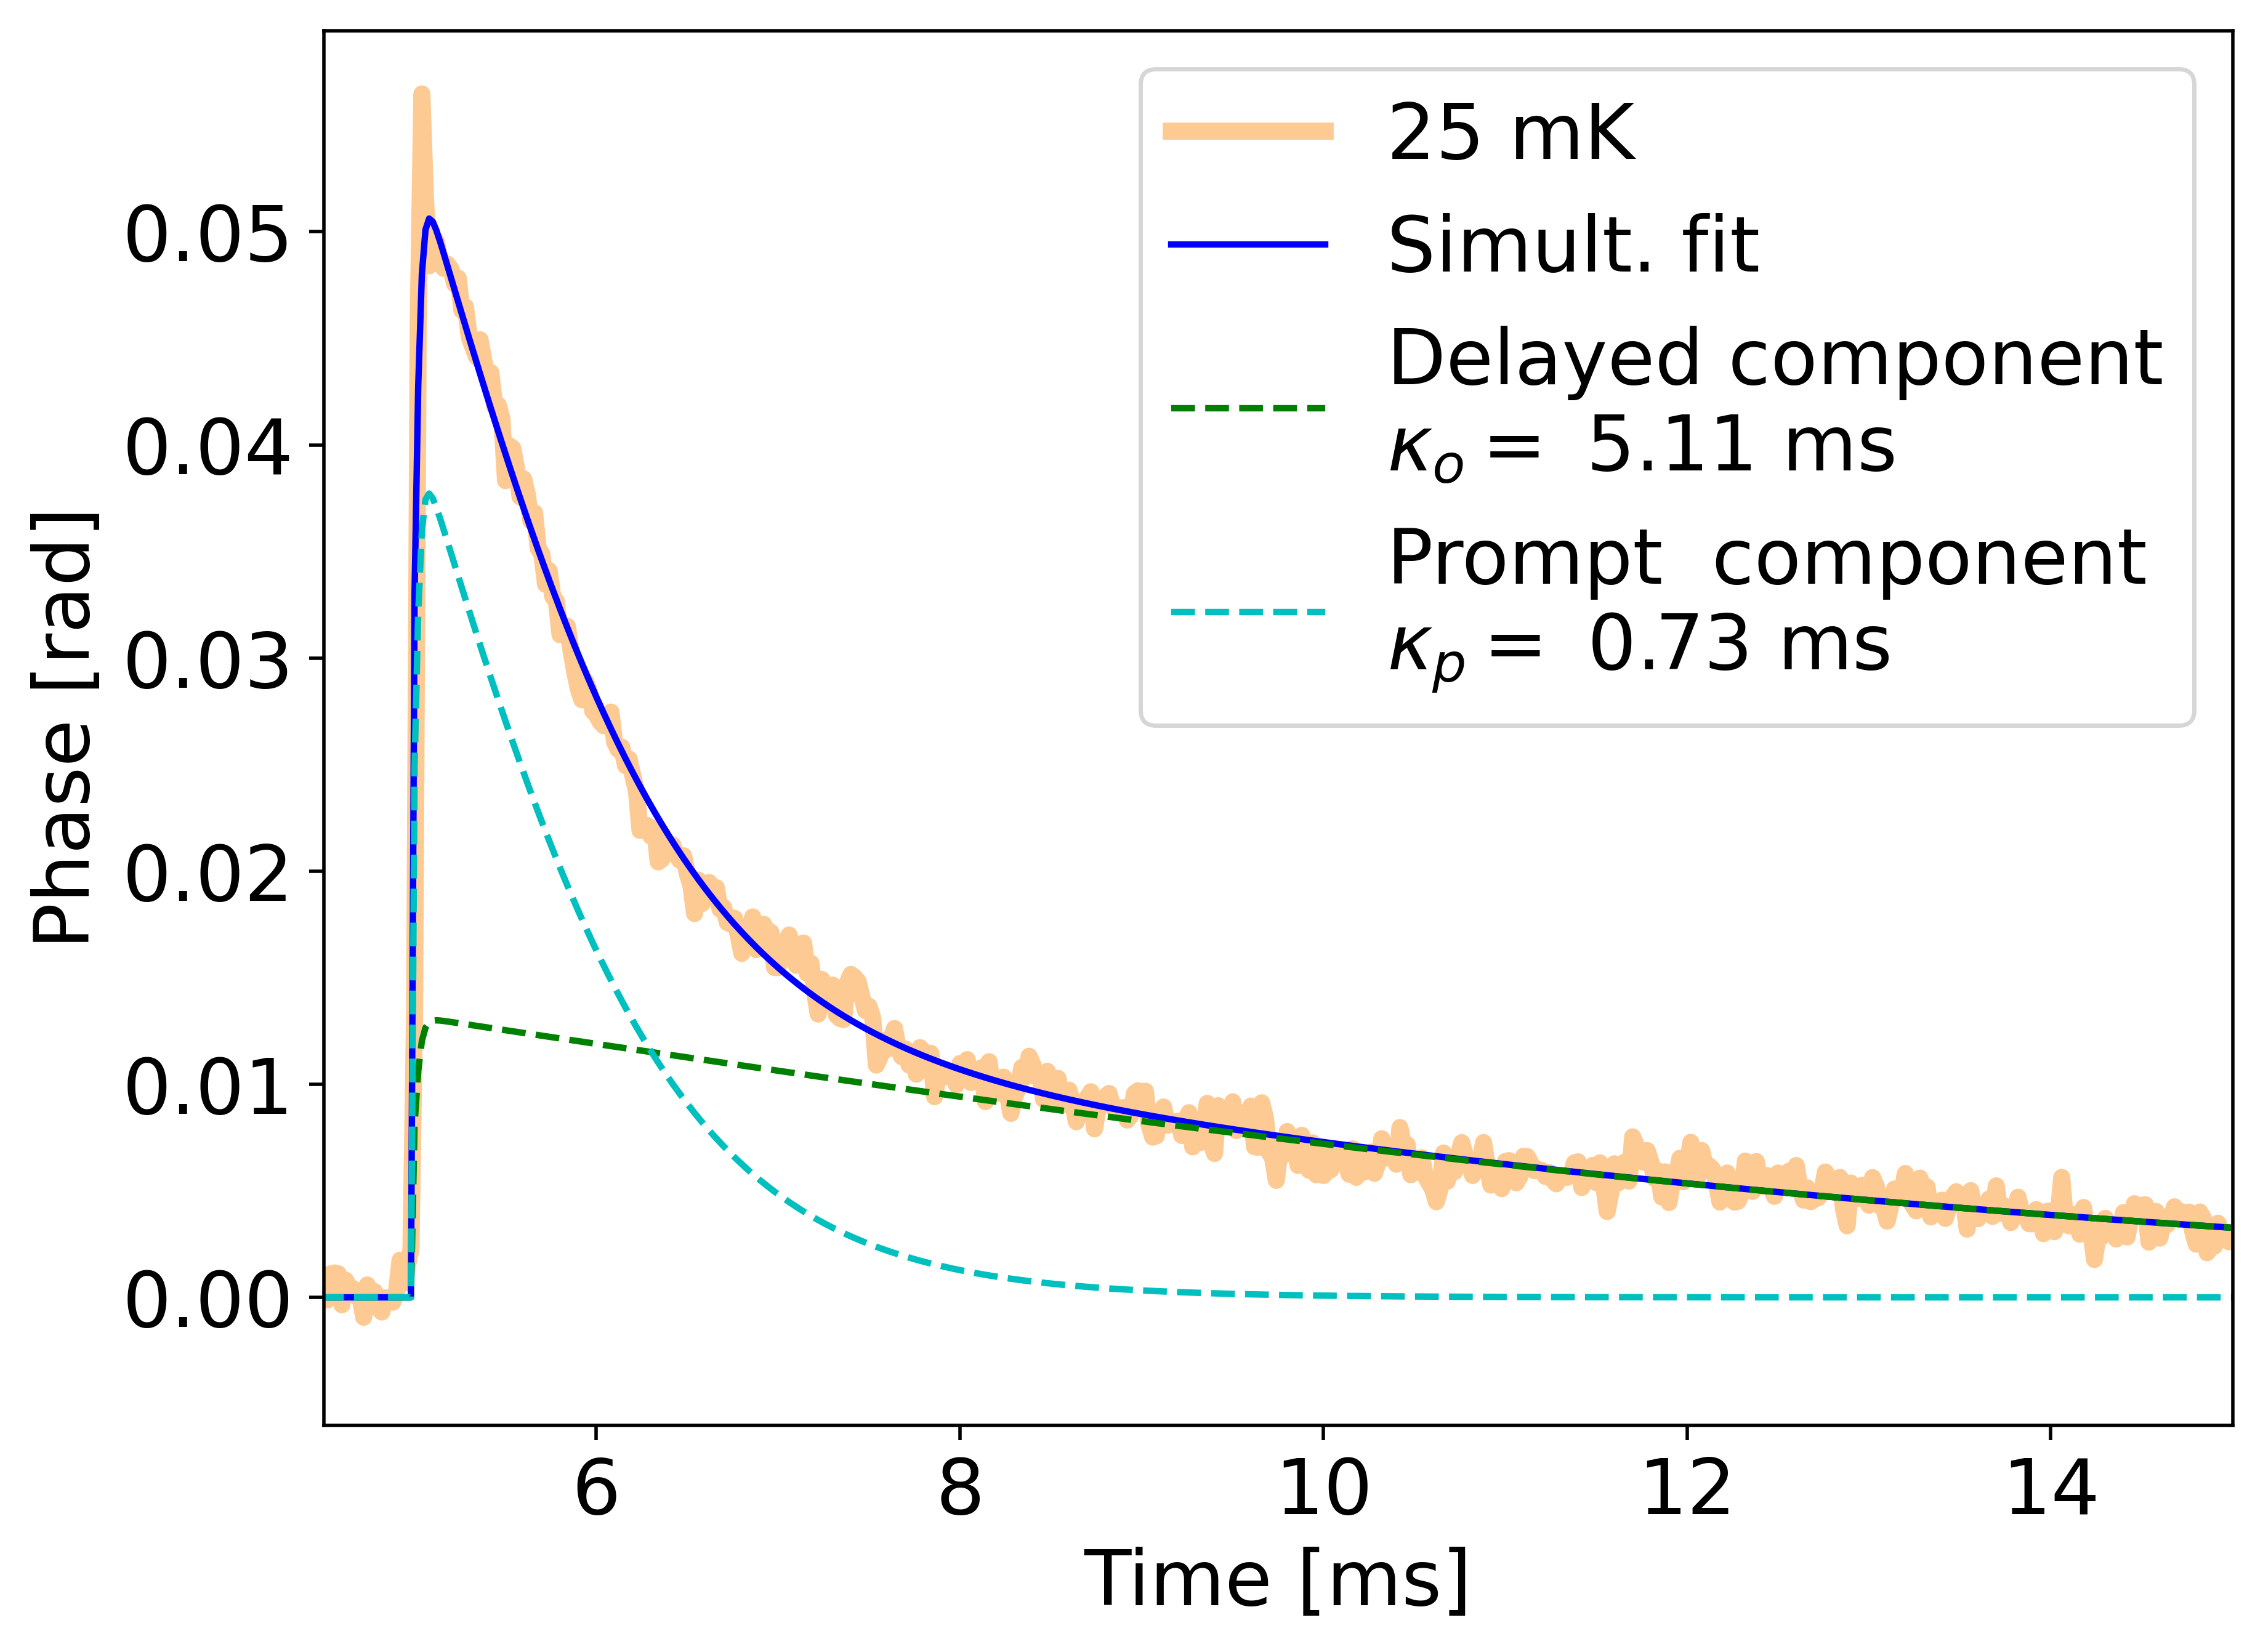

In [8]:
t_max_ms = 15.0
xlims    = [4.5, t_max_ms]

##
peak_normalize = False

## Decide which style of notebook plots to create
interactive = False

## Decide which fit model to use
conv = False
    
## Create a figure for all pulses
cmap = plt.get_cmap('OrRd')

if interactive:
    %matplotlib notebook
    ax0    = plt.figure("A").gca()
    ax00   = plt.figure("AA").gca()
    ax000  = plt.figure("AAA").gca()
    ax0000 = plt.figure("AAAA").gca()
else:
    ax0    = plt.figure("A" ,figsize=(10,8),dpi=500).gca()
    ax00   = plt.figure("AA",figsize=(10,8),dpi=500).gca()
    ax000  = plt.figure("AAA",figsize=(10,8),dpi=500).gca()
    ax0000 = plt.figure("AAAA",figsize=(10,8),dpi=500).gca()

ax0.set_xlabel("Time [ms]")
ax0.set_ylabel("Phase [rad]")
ax0.set_title("Feedline RF Power: "+str(-30-line_atten_dB)+r" dBm; $V_\mathrm{LED}=$"+str(4.00))

ax00.set_xlabel("Time [ms]")
ax00.set_ylabel("Phase [rad]")
ax00.set_title("Feedline RF Power: "+str(-30-line_atten_dB)+r" dBm; $V_\mathrm{LED}=$"+str(4.00))
ax00.set_xlim(xlims)

ax000.set_xlabel("Time [ms]")
ax000.set_ylabel("Normalized Pulse")
ax000.set_title("Feedline RF Power: "+str(-30-line_atten_dB)+r" dBm; $V_\mathrm{LED}=$"+str(4.00))
ax000.set_xlim(xlims)

ax0000.set_xlabel("Time [ms]")
ax0000.set_ylabel("Normalized Pulse")
ax0000.set_title("Feedline RF Power: "+str(-30-line_atten_dB)+r" dBm; $V_\mathrm{LED}=$"+str(4.00))
ax0000.set_xlim(xlims)

## Initialize containers for our initial guesses
N_temps        = len(temps_mK)
lifetimes      = np.zeros(N_temps)
amplitudes     = np.zeros(N_temps)
prompt_fall_ms = np.zeros(N_temps)
delayd_fall_ms = np.zeros(N_temps)
pulse_max_phse = np.zeros(N_temps)
prompt_fall_err= np.zeros(N_temps)
delayd_fall_err= np.zeros(N_temps)

## Initialize a data frame for the optimal parameters
param_names = ['amp delay', 'rise delay [ms]', 'fall delay [ms]', 'amp prompt', 'rise prompt [ms]', 'fall prompt [ms]']
popt_data = pd.DataFrame(columns=param_names)

for i in np.arange(N_temps):
    k = data.keys()[1+i]
    print(k+ "mK----------")
    
    ## Get the color for this temperature
    color=cmap( (float(k)+50) / (np.max(temps_mK)+50) )
    
    ## Pull the averate pulse and time values
    t_vals = np.array(data["time(ms)"]) #- ts
    p_vals = np.array(data[k])
    if peak_normalize:
        p_vals = p_vals / np.max(p_vals)
    
    #### === ==================== === ###
    
    ## Estimate the single exponential parameters
    param_est = pf.estimate_params(t_vals, p_vals, t_cutoff_ms=15.0, verbose=True)
    
    ## Save our calculated guesses for plotting later
    lifetimes[i]      = param_est["tau"]
    amplitudes[i]     = param_est["amp"]
    pulse_max_phse[i] = param_est["pmax"]
    
    ## Run the fit routine
    ## tp_guess (float): guess for time constant: prompt rise time
    ## td_guess (float): guess for time constant: delayed rise time
    ## kd_fac_guess (float): multiplicative factor of prompt fall time to guess delayed fall time
    ## ad_fac_guess (float): divisive factor of prompt amplitude (at t=0) to guess delayed amplitude
    p_guess, p_opt, p_cov = pf.run_fit(t_vals, p_vals, param_est, 
                                       tp_guess=0.01, td_guess=0.1, 
                                       kd_fac_guess=10.0, ad_fac_guess=10.0, 
                                       t_cutoff_ms=t_max_ms,
                                       convolve=conv)
    p_err = np.sqrt(np.diag(p_cov))
    
    ## Save the optimal parameters to the dataframe
    popt_data = popt_data.append({param_names[i]:p_opt[i] for i in np.arange(len(param_names))},ignore_index=True)
        
    ## Get a curve for the best guess
    if conv:
        all_guess = pf.dbl_pls_shape_conv(t_vals,p_guess[0],p_guess[1],p_guess[2],p_guess[3],p_guess[4],p_guess[5])
    else:
        all_guess = pf.dbl_pls_shape(t_vals,p_guess[0],p_guess[1],p_guess[2],p_guess[3],p_guess[4],p_guess[5])
    
    ## Get a curve for the optimal shape
    if conv:
        all_pls   = pf.dbl_pls_shape_conv(t_vals,p_opt[0],p_opt[1],p_opt[2],p_opt[3],p_opt[4],p_opt[5])
    else:
        all_pls   = pf.dbl_pls_shape(t_vals,p_opt[0],p_opt[1],p_opt[2],p_opt[3],p_opt[4],p_opt[5])
        
    ## Save our optimal parameters for plotting later
    prompt_fall_ms[i] = p_opt[5]
    delayd_fall_ms[i] = p_opt[2]
    
    prompt_fall_err[i] = p_err[5]
    delayd_fall_err[i] = p_err[2]
    
    #### === ==================== === ###
    
    ## Add the average pulse to the to the plot of all temperatures
    ax0.plot( t_vals, p_vals, label=k+r" mK" , color=color)
    ax00.plot( t_vals, p_vals, label=k+r" mK" , color=color, alpha=0.33)
    ax000.plot( t_vals, p_vals/np.max(p_vals), label=k+r" mK" , color=color)
    ax0000.plot( t_vals, p_vals/np.max(p_vals), label=k+r" mK" , color=color, alpha=0.33)
    
    ## Create a new plot for each individual temperature
    if interactive:
        plt.figure(str(i)+"B")
    else:
        plt.figure(str(i)+"B",figsize=(8,6),dpi=500)
    ax1 = plt.gca()
    ax1.set_xlabel("Time [ms]")
    ax1.set_ylabel("Phase [rad]")
    
    ## Plot the pulse
    ax1.plot( t_vals, p_vals, label=k+" mK", color=color, linewidth=4)
    # ax1.plot( t_vals, p_vals, label=k+r" mK: $\tau_\mathrm{exp}=$"+str(int(lifetimes[i]*1e3)/1000.)+" ms", color=color, linewidth=4)
    ylims = ax1.get_ylim()
    
    ## Draw the single exponential guess
    if False:
        ax1.plot( t_vals, pf.exp_fit(t_vals,amplitudes[i],lifetimes[i]), 'k:', label='Single exponential')
    
    ## Draw the overall shape
    if False:
        ax1.plot( t_vals, all_guess, 'b:', label="Simult. fit - initial guess")
    ax1.plot( t_vals, all_pls  , 'b-', label="Simult. fit")# - optimal")
    ax00.plot(t_vals, all_pls  , label=None, color=color, ls='-')
    ax0000.plot(t_vals, all_pls/np.max(all_pls), label=None, color=color, ls='-')
    
    ## Draw the prompt and delayed components' individual shapes
    ax1.plot( t_vals, pf.double_exp(t_vals,p_opt[0],p_opt[1],p_opt[2]), 'g--', label="Delayed component\n"+r"$\kappa_o=$ %.2f ms" % p_opt[2])
    ax1.plot( t_vals, pf.double_exp(t_vals,p_opt[3],p_opt[4],p_opt[5]), 'c--', label="Prompt  component\n"+r"$\kappa_p=$ %.2f ms" % p_opt[5])
    
    ## Finalize the axes
    # ax1.set_ylim(ylims)
    ax1.set_xlim(xlims if float(k)<201.0 else [xlims[0],6.5])#10.0])
    ax1.legend()
    
ax0.legend()
ax0.set_xlim([xlims[0],2.0*t_max_ms])

ax00.legend()
ax000.legend()
ax0000.legend()


popt_data['Temp [mK]'] = temps_mK

In [ ]:
popt_data

In [ ]:
if interactive:
    ax = plt.figure().gca()
else:
    ax = plt.figure(dpi=500).gca()
ax.scatter(temps_mK,lifetimes,c=cmap( temps_mK / np.max(temps_mK) ))
ax.set_xlabel("Temperature [mK]")
ax.set_ylabel("Naive Exponential Lifetime [ms]")
if True:
    ylims = ax.get_ylim()
    ax.set_ylim([0.5*np.min(lifetimes[lifetimes>0]) , 2*ylims[1]])
    ax.set_yscale('log')

In [ ]:
kB    = 8.617333262e-5 ## eV/K
Delta = 184e-6 ## eV
tau0  = 438.0e-9 ## sec -- from https://journals.aps.org/prb/abstract/10.1103/PhysRevB.14.4854
Tc    = 1.19 ## K -- from https://journals.aps.org/prb/abstract/10.1103/PhysRevB.14.4854
def theory_curve(T_K,Tc_K,delta_eV,tau0_s):
    return ( (tau0_s/np.sqrt(np.pi)) * 
            np.power(kB*Tc_K/(2*delta_eV),5./2.) * 
            np.sqrt(Tc_K/T_K) * 
            np.exp(delta_eV/(kB*T_K)) )

In [ ]:
if interactive:
    ax = plt.figure().gca()
else:
    ax = plt.figure(dpi=500).gca()
ax.scatter(temps_mK,prompt_fall_ms*1e-3,c=cmap( temps_mK / np.max(temps_mK) ),marker='o',label="Prompt")
ax.scatter(temps_mK,delayd_fall_ms*1e-3,c=cmap( temps_mK / np.max(temps_mK) ),marker='v',label="Delayed")
for i in np.arange(len(temps_mK)):
    ax.errorbar(temps_mK[i],prompt_fall_ms[i]*1e-3,yerr=prompt_fall_err[i]*1e-3,c=cmap( temps_mK[i] / np.max(temps_mK) ),marker=None,ls='None')
    ax.errorbar(temps_mK[i],delayd_fall_ms[i]*1e-3,yerr=delayd_fall_err[i]*1e-3,c=cmap( temps_mK[i] / np.max(temps_mK) ),marker=None,ls='None')
ax.set_xlabel("Temperature [mK]")
ax.set_ylabel("Fit Fall Time Constants [s]")
if True:
    ylims = ax.get_ylim()
    ax.set_ylim([0.3*np.min(lifetimes[delayd_fall_ms>0]*1e-3) , 2*ylims[1]])
    if True:
        ax.set_ylim([5e-6,1e-2])
    ax.set_yscale('log')
if False:
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    xrange = np.linspace(start=xlims[0],stop=xlims[1],num=1000)
    theory = theory_curve(xrange/1e3,Tc,Delta,tau0)
    ax.plot(xrange,theory,'k-')
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
ax.legend(loc='best')

In [ ]:
if interactive:
    ax = plt.figure().gca()
else:
    ax = plt.figure(dpi=500).gca()
ax.scatter(temps_mK,pulse_max_phse,c=cmap( temps_mK / np.max(temps_mK) ),marker='o')
ax.set_xlabel("Temperature [mK]")
ax.set_ylabel("Phase Amplitude [rad]")
if False:
    ylims = ax.get_ylim()
    ax.set_ylim([0.3*np.min(pulse_max_phse[pulse_max_phse>0]) , 2*ylims[1]])
    ax.set_yscale('log')